# Importing the libraries

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
!pip install squarify
import squarify

# Evaluation Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error


# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
!pip -vvv install prettytable

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# To remove warning while printing
import warnings


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Non-user install because site-packages writeable
Created temporary directory: /tmp/pip-build-tracker-t0o38acv
Initialized build tracking at /tmp/pip-build-tracker-t0o38acv
Created build tracker: /tmp/pip-build-tracker-t0o38acv
Entered build tracker: /tmp/pip-build-tracker-t0o38acv
Created temporary directory: /tmp/pip-install-70zkk1bv
Created temporary directory: /tmp/pip-ephem-wheel-cache-lf44d4er
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Created temporary directory: /tmp/pip-unpack-f0ylg_86
Removed build tracker: '/tmp/pip-build-tracker-t0o38acv'


# Depression Predictions

## Importing the dataset and Data Preprocessing


In [2]:
dataset = pd.read_csv('Dataset - depression.csv')
depressionDataset = dataset.copy()

In [3]:
depressionDataset

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,...,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,stress_severity,stressfulness,stress_diagnosis,stress_treatment,pss_score
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,...,True,False,False,7,False,Moderate,True,False,False,14
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,...,False,False,False,14,True,Mild,False,False,False,28
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,...,False,False,False,6,False,Mild,False,False,False,12
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,...,True,False,False,11,True,Severe,True,False,False,22
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,...,True,False,False,3,False,Moderate,True,False,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,763,4,24,female,21.096191,Normal,6,Mild,False,False,...,False,False,False,3,False,Mild,False,False,False,8
763,764,4,22,male,25.308642,Overweight,4,None-minimal,False,False,...,False,False,False,3,False,None-minimal,False,False,False,2
764,765,4,22,male,22.720438,Normal,2,None-minimal,False,False,...,False,False,False,4,False,None-minimal,False,False,False,12
765,766,4,22,female,23.033168,Normal,17,Moderately severe,True,False,...,True,False,False,15,True,Moderately severe,True,False,False,10


In [4]:
# Dropping columns

depressionDataset.drop(['id', 'school_year','gad_score','anxiousness',
                        'anxiety_diagnosis','anxiety_treatment',"anxiety_severity",'epworth_score',
                        'stress_severity', 'stressfulness', 'stress_diagnosis','stress_treatment',
                        'pss_score'],
           axis=1,inplace=True)

In [5]:
depressionDataset.head()

,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,sleepiness
0,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,False
1,18,male,19.841270,Normal,8,Mild,False,False,False,False,True
2,19,male,25.102391,Overweight,8,Mild,False,False,False,False,False
3,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,True
4,18,male,25.617284,Overweight,6,Mild,False,False,False,False,False


In [6]:
depressionDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   767 non-null    int64  
 1   gender                767 non-null    object 
 2   bmi                   767 non-null    float64
 3   who_bmi               767 non-null    object 
 4   phq_score             767 non-null    int64  
 5   depression_severity   765 non-null    object 
 6   depressiveness        766 non-null    object 
 7   suicidal              767 non-null    bool   
 8   depression_diagnosis  767 non-null    bool   
 9   depression_treatment  767 non-null    bool   
 10  sleepiness            767 non-null    bool   
dtypes: bool(4), float64(1), int64(2), object(4)
memory usage: 45.1+ KB


In [7]:
percent_missing = depressionDataset.isnull().sum() * 100 / len(depressionDataset)
missing_value_df = pd.DataFrame({
                                 'percent_missing': percent_missing})
missing_value_df

,percent_missing
age,0.000000
gender,0.000000
bmi,0.000000
who_bmi,0.000000
phq_score,0.000000
depression_severity,0.260756
depressiveness,0.130378
suicidal,0.000000
depression_diagnosis,0.000000
depression_treatment,0.000000


In [8]:
print("Unique values of gender: ",depressionDataset["gender"].unique())
print("Unique values of who_bmi: ",depressionDataset["who_bmi"].unique())
print("Unique values of depressiveness: ",depressionDataset["depressiveness"].unique())
print("Unique values of suicidal: ",depressionDataset["suicidal"].unique())
print("Unique values of depression_diagnosis: ",depressionDataset["depression_diagnosis"].unique())
print("Unique values of depression_treatment: ",depressionDataset["depression_treatment"].unique())
print("Unique values of sleepiness: ",depressionDataset["sleepiness"].unique())

print("Unique values of depression_severity: ",depressionDataset["depression_severity"].unique())

Unique values of gender:  ['male' 'female']
Unique values of who_bmi:  ['Class I Obesity' 'Normal' 'Overweight' 'Not Availble'
 'Class III Obesity' 'Underweight' 'Class II Obesity']
Unique values of depressiveness:  [False True nan]
Unique values of suicidal:  [False  True]
Unique values of depression_diagnosis:  [False  True]
Unique values of depression_treatment:  [False  True]
Unique values of sleepiness:  [False  True]
Unique values of depression_severity:  ['Mild' 'Moderately severe' 'None-minimal' 'Moderate' nan 'Severe' 'none']


In [9]:
depressionDataset.dropna(inplace=True)

In [10]:
percent_missing = depressionDataset.isnull().sum() * 100 / len(depressionDataset)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
age,0.0
gender,0.0
bmi,0.0
who_bmi,0.0
phq_score,0.0
depression_severity,0.0
depressiveness,0.0
suicidal,0.0
depression_diagnosis,0.0
depression_treatment,0.0


In [11]:
depressionDataset.isna().sum()

age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     0
depressiveness          0
suicidal                0
depression_diagnosis    0
depression_treatment    0
sleepiness              0
dtype: int64

In [12]:
depressionDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 0 to 766
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   765 non-null    int64  
 1   gender                765 non-null    object 
 2   bmi                   765 non-null    float64
 3   who_bmi               765 non-null    object 
 4   phq_score             765 non-null    int64  
 5   depression_severity   765 non-null    object 
 6   depressiveness        765 non-null    object 
 7   suicidal              765 non-null    bool   
 8   depression_diagnosis  765 non-null    bool   
 9   depression_treatment  765 non-null    bool   
 10  sleepiness            765 non-null    bool   
dtypes: bool(4), float64(1), int64(2), object(4)
memory usage: 50.8+ KB


In [13]:
# Percentage of samples remove during pre-processing
print("Original Number of samples:", len(dataset))
print("Number of samples after preprocessing:", len(depressionDataset))

print("Number of samples removed during preprocessing:", len(dataset) - len(depressionDataset))
print("Percentage of samples removed during preprocessing:", round((((len(dataset) - (len(depressionDataset)))/len(dataset))*100),2))

Original Number of samples: 767
Number of samples after preprocessing: 765
Number of samples removed during preprocessing: 2
Percentage of samples removed during preprocessing: 0.26


## Processing the dataset

In [14]:
Encode_Depression_Data = depressionDataset.copy()

# Encode_Depression_Data["age"] = LabelEncoder().fit_transform(Encode_Depression_Data["age"])
# Encode_Depression_Data["bmi"] = LabelEncoder().fit_transform(Encode_Depression_Data["bmi"])
# Encode_Depression_Data["phq_score"] = LabelEncoder().fit_transform(Encode_Depression_Data["phq_score"])

'''
Unique values of gender:  ['male' 'female']
Unique values of who_bmi:  ['Class I Obesity' 'Normal' 'Overweight' 'Not Availble'
 'Class III Obesity' 'Underweight' 'Class II Obesity']
Unique values of depressiveness:  [False True]
Unique values of suicidal:  [False  True]
Unique values of depression_diagnosis:  [False  True]
Unique values of depression_treatment:  [False  True]
Unique values of sleepiness:  [False  True]
Unique values of depression_severity:  ['Mild' 'Moderately severe' 'None-minimal'
                                        'Moderate' 'Severe' 'none']
'''

# Gender
'''
female: 0
male: 1
'''
Encode_Depression_Data["gender"]=[1 if i.strip()== "male"
                       else 0 for i in Encode_Depression_Data["gender"]]

# who_bmi
'''
Class I Obesity: 0
Normal: 1
Overweight: 2
Not Availble: 3
Class III Obesity: 4
Class II Obesity: 5
'''
Encode_Depression_Data["who_bmi"]=[1 if i.strip()== "Normal"
                                else 0 if i.strip() == "Class I Obesity"
                               else 2 if i.strip()=="Overweight"
                               else 3 if i.strip()=="Not Availble"
                               else 4 if i.strip()=="Class III Obesity"
                               else 5 for i in Encode_Depression_Data["who_bmi"]]

# depressiveness
'''
False: 0
True: 1
'''
Encode_Depression_Data["depressiveness"]=[1 if i == True
                       else 0 for i in Encode_Depression_Data["depressiveness"]]

# suicidal
'''
False: 0
True: 1
'''
Encode_Depression_Data["suicidal"]=[1 if i == True
                       else 0 for i in Encode_Depression_Data["suicidal"]]

# depression_diagnosis
'''
False: 0
True: 1
'''
Encode_Depression_Data["depression_diagnosis"]=[1 if i == True
                       else 0 for i in Encode_Depression_Data["depression_diagnosis"]]

# depression_treatment
'''
False: 0
True: 1
'''
Encode_Depression_Data["depression_treatment"]=[1 if i == True
                       else 0 for i in Encode_Depression_Data["depression_treatment"]]

# sleepiness
'''
False: 0
True: 1
'''
Encode_Depression_Data["sleepiness"]=[1 if i == True
                       else 0 for i in Encode_Depression_Data["sleepiness"]]

# depression_severity
'''
Mild: 0
Moderately severe: 1
None-minimal: 2
Moderate: 3
Severe: 4
none: 5
'''
Encode_Depression_Data["depression_severity"]=[1 if i.strip()== "Moderately severe"
                                else 0 if i.strip() == "Mild"
                               else 2 if i.strip()=="None-minimal"
                               else 3 if i.strip()=="Moderate"
                               else 4 if i.strip()=="Severe"
                               else 5 for i in Encode_Depression_Data["depression_severity"]]


Encoded_Dataset = Encode_Depression_Data.astype("float32")

In [15]:
# Encoded_Dataset

In [16]:
Encoded_Dataset.head()

,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,sleepiness
0,19.0,1.0,33.333332,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18.0,1.0,19.841270,1.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0
2,19.0,1.0,25.102392,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18.0,0.0,23.738663,1.0,19.0,1.0,1.0,1.0,0.0,0.0,1.0
4,18.0,1.0,25.617285,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0


## Splitting the dataset into the Training set and Test set

In [17]:
Depression_X =  Encoded_Dataset.drop("depression_severity",axis=1)
Depression_Y = Encoded_Dataset["depression_severity"]

In [18]:
print(Depression_X)

      age  gender        bmi  who_bmi  phq_score  depressiveness  suicidal  \
0    19.0     1.0  33.333332      0.0        9.0             0.0       0.0   
1    18.0     1.0  19.841270      1.0        8.0             0.0       0.0   
2    19.0     1.0  25.102392      2.0        8.0             0.0       0.0   
3    18.0     0.0  23.738663      1.0       19.0             1.0       1.0   
4    18.0     1.0  25.617285      2.0        6.0             0.0       0.0   
..    ...     ...        ...      ...        ...             ...       ...   
762  24.0     0.0  21.096191      1.0        6.0             0.0       0.0   
763  22.0     1.0  25.308641      2.0        4.0             0.0       0.0   
764  22.0     1.0  22.720438      1.0        2.0             0.0       0.0   
765  22.0     0.0  23.033167      1.0       17.0             1.0       0.0   
766  22.0     1.0  22.598141      1.0        6.0             0.0       0.0   

     depression_diagnosis  depression_treatment  sleepiness  
0

In [19]:
print(Depression_Y)

0      0.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
762    0.0
763    2.0
764    2.0
765    1.0
766    0.0
Name: depression_severity, Length: 765, dtype: float32


In [20]:
Depression_X_Train,Depression_X_Test,Depression_Y_Train,Depression_Y_Test = train_test_split(Depression_X,Depression_Y,test_size=0.3,random_state=42)

## Logistic Regression

In [21]:
# instantiate the model (using the default parameters)

Depression_logreg = LogisticRegression(max_iter=50)

# fit the model with data
Depression_logreg.fit(Depression_X_Train,Depression_Y_Train)

# Predict the values using the Model
y_pred=Depression_logreg.predict(Depression_X_Test)
print(y_pred)

[0. 2. 0. 0. 0. 2. 2. 3. 3. 2. 2. 3. 2. 2. 0. 0. 0. 2. 2. 0. 0. 0. 0. 2.
 0. 1. 0. 2. 3. 1. 1. 1. 3. 0. 2. 0. 3. 0. 0. 2. 3. 2. 1. 2. 0. 0. 0. 0.
 0. 2. 2. 3. 0. 1. 2. 0. 0. 2. 2. 2. 1. 3. 0. 3. 2. 0. 2. 0. 0. 2. 0. 2.
 2. 2. 0. 0. 3. 0. 2. 0. 0. 0. 0. 0. 5. 3. 2. 3. 3. 2. 2. 0. 0. 2. 0. 2.
 2. 2. 0. 0. 0. 2. 2. 0. 0. 2. 0. 2. 2. 0. 2. 2. 0. 0. 0. 0. 0. 2. 2. 0.
 0. 2. 1. 1. 0. 2. 0. 2. 2. 3. 0. 0. 2. 3. 2. 0. 3. 2. 2. 2. 2. 0. 0. 0.
 0. 0. 0. 2. 3. 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 2. 2. 2. 1. 2. 2. 1. 0. 2.
 2. 2. 0. 0. 0. 0. 2. 3. 2. 0. 0. 3. 0. 3. 0. 0. 0. 2. 2. 2. 2. 2. 2. 0.
 0. 3. 3. 0. 2. 1. 3. 2. 3. 4. 0. 0. 2. 2. 0. 0. 1. 0. 2. 2. 2. 2. 3. 0.
 2. 0. 0. 0. 1. 0. 3. 0. 3. 0. 0. 2. 0. 2.]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Confusion Matrix
LRConfusionMatrx = confusion_matrix(Depression_Y_Test, y_pred)
print(LRConfusionMatrx)


[[101   0   3   0   0   0]
 [  0   8   0   0   0   0]
 [  0   0  81   0   0   0]
 [  1   4   0  28   0   0]
 [  0   2   0   0   1   0]
 [  0   0   0   0   0   1]]


<Axes: >

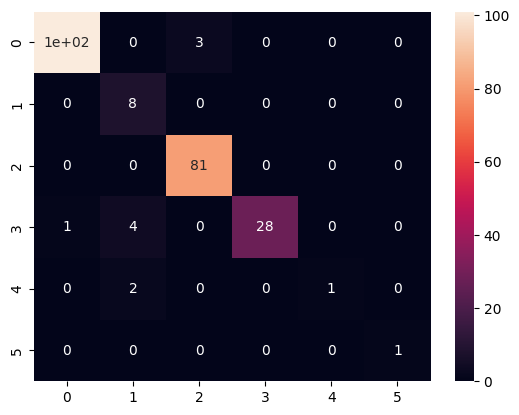

In [23]:
sns.heatmap(LRConfusionMatrx, annot=True)

<Axes: >

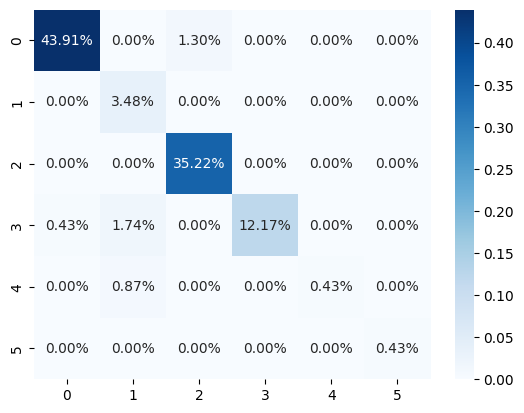

In [24]:
sns.heatmap(LRConfusionMatrx/np.sum(LRConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [25]:
# # Accuracy
LRAccuracyScore = accuracy_score(Depression_Y_Test, y_pred)
print(round(LRAccuracyScore,2))

0.96


In [26]:
# # Recall
LRRecallScore = recall_score(Depression_Y_Test, y_pred, average='weighted')
print(round(LRRecallScore,2))

0.96


In [27]:
# # Precision
LRPrecisionScore = precision_score(Depression_Y_Test, y_pred, average='weighted')
print(round(LRPrecisionScore,2))

0.97


In [28]:
# Root Mean Square Error
LRRMSError = mean_squared_error(Depression_Y_Test, y_pred, squared=False)
print(round(LRRMSError,2) )

0.49


## Gaussian Naive Bayes

In [29]:
# instantiate the model (using the default parameters)
Depression_NaiveBayes = GaussianNB()

# fit the model with data
Depression_NaiveBayes.fit(Depression_X_Train,Depression_Y_Train)

# Predict the values using the Model
y_pred=Depression_NaiveBayes.predict(Depression_X_Test)
print(y_pred)

[0. 2. 0. 0. 0. 2. 2. 3. 3. 2. 2. 3. 2. 2. 2. 2. 0. 2. 2. 2. 0. 2. 0. 2.
 0. 1. 0. 2. 3. 3. 1. 3. 3. 2. 2. 0. 1. 0. 0. 2. 3. 2. 4. 2. 0. 0. 0. 2.
 3. 2. 2. 3. 0. 4. 2. 0. 0. 2. 2. 2. 1. 3. 0. 3. 2. 0. 2. 0. 0. 2. 0. 2.
 2. 2. 0. 2. 3. 0. 2. 0. 2. 0. 2. 2. 5. 3. 2. 3. 3. 2. 2. 2. 2. 3. 0. 2.
 2. 2. 0. 0. 2. 2. 2. 0. 0. 2. 2. 2. 2. 2. 2. 2. 0. 0. 2. 0. 0. 2. 2. 0.
 0. 2. 3. 1. 0. 2. 0. 2. 2. 3. 0. 0. 2. 3. 2. 0. 3. 2. 2. 2. 2. 0. 0. 0.
 0. 0. 0. 2. 3. 0. 2. 2. 2. 3. 0. 0. 0. 2. 0. 2. 2. 2. 4. 2. 2. 1. 0. 2.
 2. 0. 0. 0. 0. 2. 2. 3. 2. 0. 0. 3. 0. 3. 3. 3. 0. 2. 2. 2. 2. 2. 2. 0.
 0. 3. 3. 0. 2. 4. 3. 2. 3. 1. 0. 3. 2. 2. 2. 0. 1. 2. 2. 2. 2. 2. 3. 0.
 2. 0. 0. 0. 4. 0. 3. 0. 3. 2. 2. 2. 0. 2.]


In [30]:
# Confusion Matrix
NaiveBayesConfusionMatrx = confusion_matrix(Depression_Y_Test, y_pred)
print(NaiveBayesConfusionMatrx)

[[75  0 25  4  0  0]
 [ 0  4  0  0  4  0]
 [ 0  0 80  1  0  0]
 [ 0  2  0 31  0  0]
 [ 0  2  0  0  1  0]
 [ 0  0  0  0  0  1]]


<Axes: >

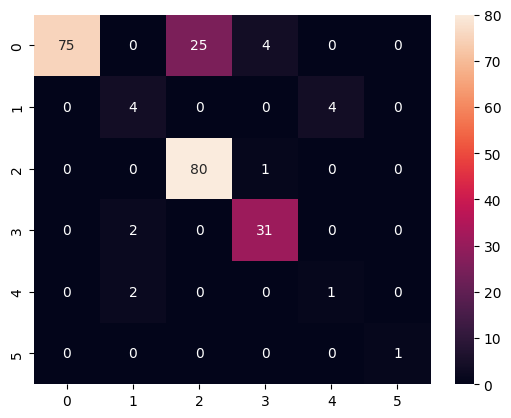

In [31]:
sns.heatmap(NaiveBayesConfusionMatrx, annot=True)

<Axes: >

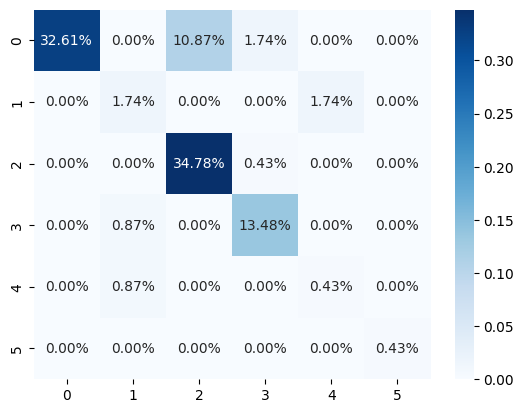

In [32]:
sns.heatmap(NaiveBayesConfusionMatrx/np.sum(NaiveBayesConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [33]:
# # Accuracy
NaiveBayesAccuracyScore = accuracy_score(Depression_Y_Test, y_pred)
print(round(NaiveBayesAccuracyScore,2))

0.83


In [34]:
# # Recall
GNBRecallScore = recall_score(Depression_Y_Test, y_pred, average='weighted')
print(round(GNBRecallScore,2))

0.83


In [35]:
# # Precision
GNBPrecisionScore = precision_score(Depression_Y_Test, y_pred, average='weighted')
print(round(GNBPrecisionScore,2))

0.87


In [36]:
# Root Mean Square Error
GNBRMSError = mean_squared_error(Depression_Y_Test, y_pred, squared=False)
print(round(GNBRMSError,2) )

0.93


## K-Nearest Neighbours

10
20
30
40
50
60
70
80
90


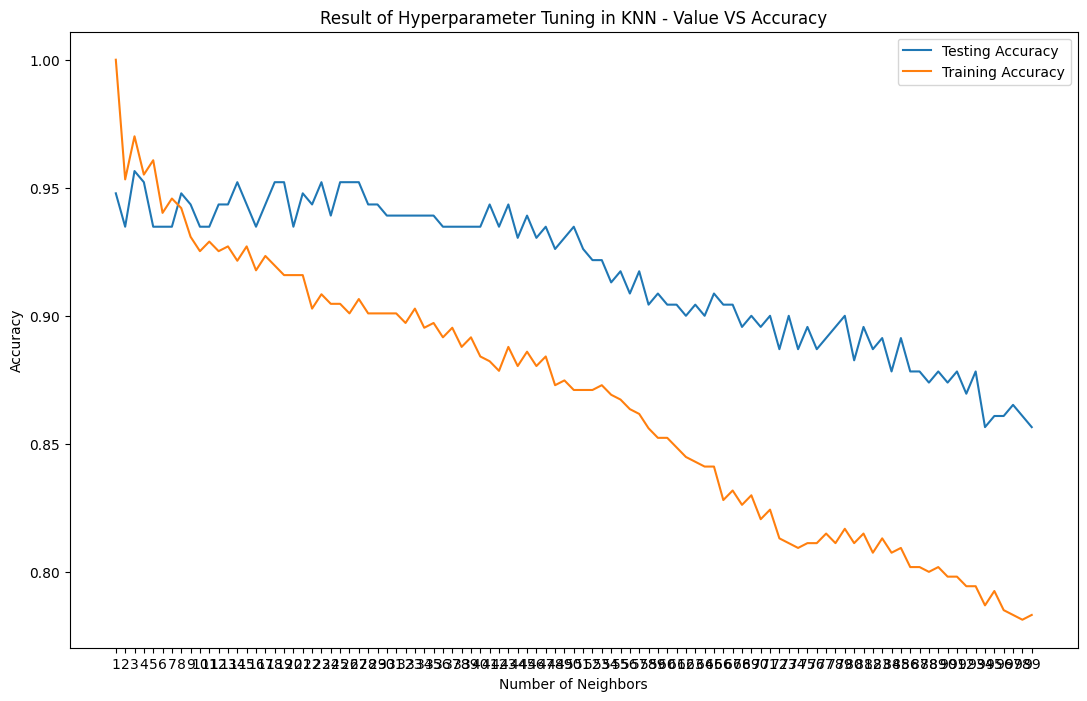

Best accuracy is 0.9565217391304348 with K = 3


In [37]:
neig = np.arange(1, 100)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(Depression_X_Train,Depression_Y_Train)
    #train accuracy
    train_accuracy.append(knn.score(Depression_X_Train, Depression_Y_Train))
    # test accuracy
    test_accuracy.append(knn.score(Depression_X_Test, Depression_Y_Test))
    if k%10 == 0:
      print(k)

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Result of Hyperparameter Tuning in KNN - Value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [38]:
# instantiate the model (using the default parameters)
Depression_KNN = KNeighborsClassifier(n_neighbors = 1+test_accuracy.index(np.max(test_accuracy)))

# fit the model with data
Depression_KNN.fit(Depression_X_Train,Depression_Y_Train)

# Predict the values using the Model
y_pred=Depression_KNN.predict(Depression_X_Test)
print(y_pred)

[0. 2. 0. 0. 0. 2. 2. 3. 3. 2. 2. 3. 2. 2. 0. 0. 0. 2. 2. 0. 0. 0. 0. 2.
 0. 3. 0. 2. 3. 3. 1. 3. 3. 2. 2. 0. 3. 0. 0. 2. 3. 2. 1. 2. 0. 0. 0. 0.
 0. 2. 2. 3. 0. 4. 2. 0. 0. 2. 2. 2. 1. 3. 0. 3. 2. 0. 2. 0. 0. 2. 0. 2.
 2. 2. 0. 2. 3. 0. 0. 0. 2. 3. 0. 0. 2. 3. 2. 3. 3. 2. 2. 0. 0. 2. 0. 2.
 2. 2. 0. 0. 0. 2. 2. 0. 0. 2. 0. 2. 2. 0. 2. 2. 0. 0. 0. 0. 0. 2. 2. 0.
 0. 2. 3. 1. 0. 2. 0. 2. 2. 0. 0. 0. 2. 3. 2. 0. 3. 0. 2. 2. 2. 0. 0. 0.
 0. 0. 0. 2. 3. 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 0. 2. 2. 1. 2. 2. 4. 0. 2.
 2. 0. 0. 0. 0. 2. 2. 3. 2. 0. 0. 3. 0. 3. 0. 0. 0. 2. 2. 2. 2. 2. 2. 0.
 0. 3. 3. 0. 2. 1. 3. 2. 3. 4. 0. 0. 2. 2. 0. 0. 3. 0. 2. 2. 2. 2. 3. 0.
 2. 0. 0. 0. 1. 0. 3. 0. 3. 0. 0. 2. 0. 2.]


In [39]:
# Confusion Matrix
KNNConfusionMatrx = confusion_matrix(Depression_Y_Test, y_pred)
print(KNNConfusionMatrx)

[[99  0  4  1  0  0]
 [ 0  7  0  1  0  0]
 [ 1  0 80  0  0  0]
 [ 2  0  0 31  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  1  0  0  0]]


<Axes: >

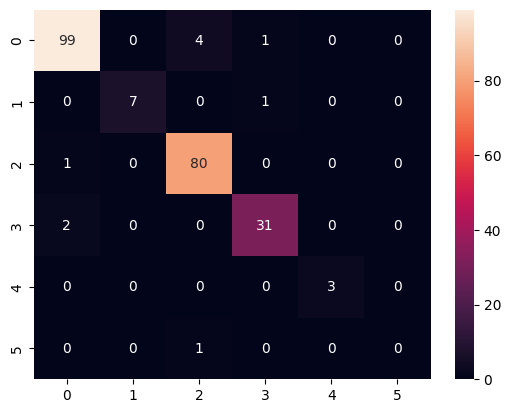

In [40]:
sns.heatmap(KNNConfusionMatrx, annot=True)

<Axes: >

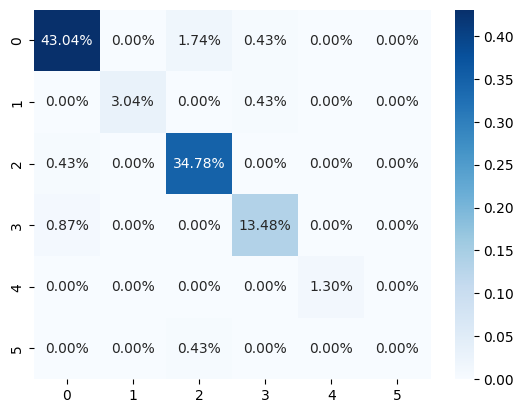

In [41]:
sns.heatmap(KNNConfusionMatrx/np.sum(KNNConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [42]:
# # Accuracy
KNNAccuracyScore = accuracy_score(Depression_Y_Test, y_pred)
print(KNNAccuracyScore)

0.9565217391304348


In [43]:
# # Recall
KNNRecallScore = recall_score(Depression_Y_Test, y_pred, average='weighted')
print(KNNRecallScore)

0.9565217391304348


In [44]:
# # Precision
KNNPrecisionScore = precision_score(Depression_Y_Test, y_pred, average='weighted')
print(KNNPrecisionScore)

0.9529411764705883


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# Root Mean Square Error
KNNRMSError = mean_squared_error(Depression_Y_Test, y_pred, squared=False)
print(KNNRMSError)

0.5107539


## Support Vector Classifier

In [46]:
# instantiate the model (using the default parameters)
Depression_SupportVectorClassifier = SVC()

# fit the model with data
Depression_SupportVectorClassifier.fit(Depression_X_Train,Depression_Y_Train)

# Predict the values using the Model
y_pred=Depression_SupportVectorClassifier.predict(Depression_X_Test)
print(y_pred)

[0. 2. 0. 0. 0. 2. 2. 3. 3. 2. 2. 3. 2. 2. 0. 0. 0. 2. 2. 0. 0. 0. 0. 2.
 0. 3. 0. 2. 3. 3. 1. 3. 3. 0. 2. 0. 3. 0. 0. 2. 3. 2. 1. 2. 0. 0. 0. 0.
 0. 2. 2. 3. 0. 1. 2. 0. 0. 2. 2. 2. 1. 3. 0. 3. 2. 0. 2. 0. 0. 2. 0. 2.
 2. 2. 0. 0. 3. 0. 0. 0. 0. 3. 0. 0. 2. 3. 2. 3. 3. 2. 2. 0. 0. 2. 0. 2.
 2. 2. 0. 0. 0. 2. 2. 0. 0. 2. 0. 2. 2. 0. 2. 2. 0. 0. 0. 0. 0. 2. 2. 0.
 0. 2. 3. 1. 0. 2. 0. 2. 2. 3. 0. 0. 2. 3. 2. 0. 3. 0. 2. 2. 2. 0. 0. 0.
 0. 0. 0. 2. 3. 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 2. 2. 2. 1. 2. 2. 1. 0. 2.
 2. 0. 0. 0. 0. 0. 2. 3. 2. 0. 0. 3. 0. 3. 3. 0. 0. 2. 2. 2. 2. 2. 2. 0.
 0. 3. 3. 0. 2. 1. 3. 2. 3. 1. 0. 0. 2. 2. 0. 0. 3. 0. 2. 2. 2. 2. 3. 0.
 2. 0. 0. 0. 1. 0. 3. 0. 3. 0. 0. 2. 0. 2.]


In [47]:
# Confusion Matrix
SVCConfusionMatrx = confusion_matrix(Depression_Y_Test, y_pred)
print(SVCConfusionMatrx)

[[103   0   0   1   0   0]
 [  0   7   0   1   0   0]
 [  0   0  81   0   0   0]
 [  0   0   0  33   0   0]
 [  0   3   0   0   0   0]
 [  0   0   1   0   0   0]]


<Axes: >

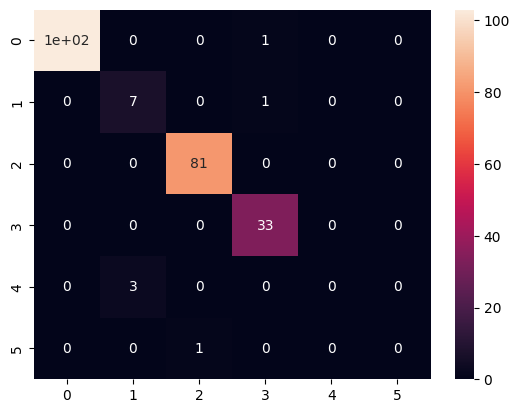

In [48]:
sns.heatmap(SVCConfusionMatrx, annot=True)

<Axes: >

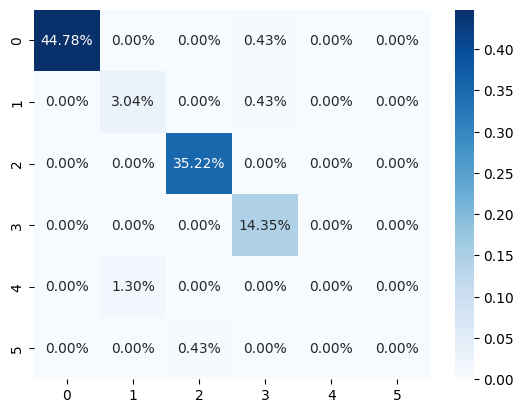

In [49]:
sns.heatmap(SVCConfusionMatrx/np.sum(SVCConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [50]:
# Accuracy
SVCAccuracyScore = accuracy_score(Depression_Y_Test, y_pred)
print(SVCAccuracyScore.round(2))

0.97


In [51]:
# Recall
SVCRecallScore = recall_score(Depression_Y_Test, y_pred, average='weighted')
print(SVCRecallScore.round(2))

0.97


In [52]:
# Precision
SVCPrecisionScore = precision_score(Depression_Y_Test, y_pred, average='weighted')
print(SVCPrecisionScore)

0.9596803514618997


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# Root Mean Square Error
SVCRMSError = mean_squared_error(Depression_Y_Test, y_pred, squared=False)
print(SVCRMSError)

0.46156633


## Decision Tree

In [54]:
# instantiate the model (using the default parameters)
Depression_DT = DecisionTreeClassifier(max_depth=3)

# fit the model with data
Depression_DT.fit(Depression_X_Train,Depression_Y_Train)

y_pred=Depression_DT.predict(Depression_X_Test)
print(y_pred)

[0. 2. 0. 0. 0. 2. 2. 3. 3. 2. 2. 3. 2. 2. 0. 0. 0. 2. 2. 0. 0. 0. 0. 2.
 0. 1. 0. 2. 3. 3. 1. 3. 3. 0. 2. 0. 3. 0. 0. 2. 3. 2. 1. 2. 0. 0. 0. 0.
 0. 2. 2. 3. 0. 1. 2. 0. 0. 2. 2. 2. 1. 3. 0. 3. 2. 0. 2. 0. 0. 2. 0. 2.
 2. 2. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 5. 3. 2. 3. 3. 2. 2. 0. 0. 2. 0. 2.
 2. 2. 0. 0. 0. 2. 2. 0. 0. 2. 0. 2. 2. 0. 2. 2. 0. 0. 0. 0. 0. 2. 2. 0.
 0. 2. 3. 1. 0. 2. 0. 2. 2. 3. 0. 0. 2. 3. 2. 0. 3. 0. 2. 2. 2. 0. 0. 0.
 0. 0. 0. 2. 3. 0. 0. 2. 0. 0. 0. 0. 0. 2. 0. 2. 2. 2. 1. 2. 2. 1. 0. 2.
 2. 0. 0. 0. 0. 0. 2. 3. 2. 0. 0. 3. 0. 3. 3. 0. 0. 2. 2. 2. 2. 2. 2. 0.
 0. 3. 3. 0. 2. 1. 3. 2. 3. 1. 0. 0. 2. 2. 0. 0. 3. 0. 2. 2. 2. 2. 3. 0.
 2. 0. 0. 0. 1. 0. 3. 0. 3. 0. 0. 2. 0. 2.]


In [55]:
# Confusion Matrix
DTConfusionMatrx = confusion_matrix(Depression_Y_Test, y_pred)
print(DTConfusionMatrx)

[[104   0   0   0   0   0]
 [  0   8   0   0   0   0]
 [  0   0  81   0   0   0]
 [  0   0   0  33   0   0]
 [  0   3   0   0   0   0]
 [  0   0   0   0   0   1]]


<Axes: >

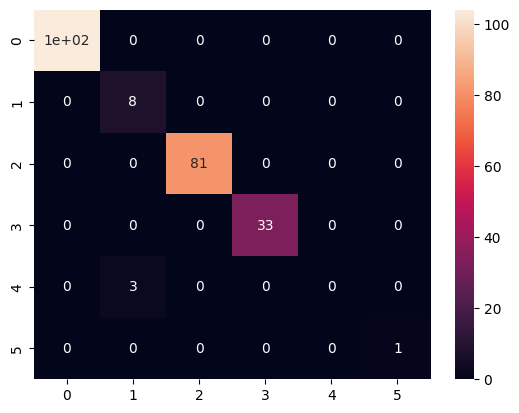

In [56]:
sns.heatmap(DTConfusionMatrx, annot=True)

<Axes: >

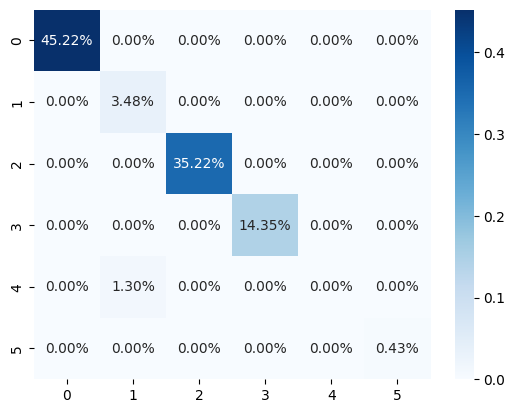

In [57]:
sns.heatmap(DTConfusionMatrx/np.sum(DTConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [58]:
# Accuracy
DTAccuracyScore = accuracy_score(Depression_Y_Test, y_pred)
print(DTAccuracyScore)

0.9869565217391304


In [59]:
# Recall
DTRecallScore = recall_score(Depression_Y_Test, y_pred, average='weighted')
print(DTRecallScore)

0.9869565217391304


In [60]:
# Precision
DTPrecisionScore = precision_score(Depression_Y_Test, y_pred, average='weighted')
print(DTPrecisionScore)

0.9774703557312253


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
# Root Mean Square Error
DTRMSError = mean_squared_error(Depression_Y_Test, y_pred, squared=False)
print(DTRMSError)

0.34262413


## Random Forest

In [62]:
# instantiate the model (using the default parameters)
Depression_RFClassifier = RandomForestClassifier(max_depth=110, n_estimators=500, verbose=False)

# fit the model with data
Depression_RFClassifier.fit(Depression_X_Train, Depression_Y_Train)

# Predict the values using the Model
y_pred = Depression_RFClassifier.predict(Depression_X_Test)

In [63]:
# Confusion Matrix
RFConfusionMatrx = confusion_matrix(Depression_Y_Test, y_pred)
print(RFConfusionMatrx)

[[104   0   0   0   0   0]
 [  0   8   0   0   0   0]
 [  0   0  81   0   0   0]
 [  0   0   0  33   0   0]
 [  0   2   0   0   1   0]
 [  0   0   0   0   0   1]]


<Axes: >

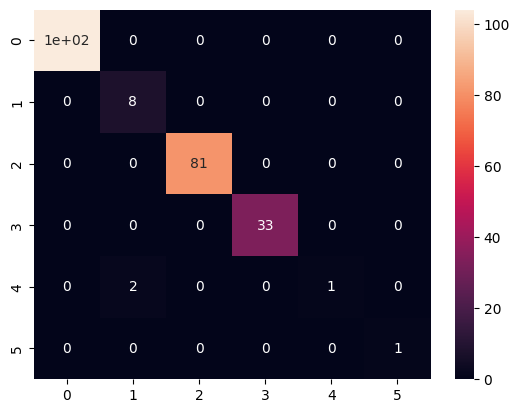

In [64]:
sns.heatmap(RFConfusionMatrx, annot=True)

<Axes: >

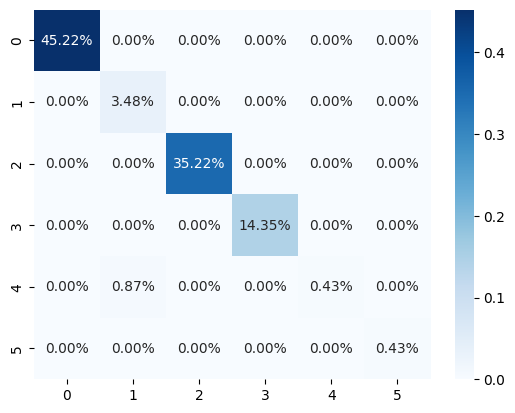

In [65]:
sns.heatmap(RFConfusionMatrx/np.sum(RFConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [66]:
# Accuracy
RFAccuracyScore = accuracy_score(Depression_Y_Test, y_pred)
print(RFAccuracyScore)

0.991304347826087


In [67]:
# Recall
RFRecallScore = recall_score(Depression_Y_Test, y_pred, average='weighted')
print(RFRecallScore)

0.991304347826087


In [68]:
# Precision
RFPrecisionScore = precision_score(Depression_Y_Test, y_pred, average='weighted')
print(RFPrecisionScore)

0.9930434782608696


In [69]:
# Root Mean Square Error
RFRMSError = mean_squared_error(Depression_Y_Test, y_pred, squared=False)
print(RFRMSError)

0.27975145


## Evaluating model performance

In [70]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Name of Model", "Accuracy", "Error Rate", "Precision", "Recall"])

myTable.title = 'Results for evaluation Parameters when Depression dataset is used'
myTable.add_row(["LR", round(LRAccuracyScore,3), round(1 - LRAccuracyScore, 3), round(LRPrecisionScore,3), round(LRRecallScore,3),  ])
myTable.add_row(["GNB", round(NaiveBayesAccuracyScore,3), round(1 - NaiveBayesAccuracyScore,3), round(GNBPrecisionScore,3), round(GNBRecallScore,3) ])
myTable.add_row(["KNN", round(KNNAccuracyScore,3), round(1 - KNNAccuracyScore,3), round(KNNPrecisionScore,3), round(KNNRecallScore,3)])
myTable.add_row(["SVC", round(SVCAccuracyScore,3), round(1 - SVCAccuracyScore,3), round(SVCPrecisionScore,3), round(SVCRecallScore,3) ])
myTable.add_row(["DT", round(DTAccuracyScore,3), round(1 - DTAccuracyScore,3) , round(DTPrecisionScore,3), round(DTRecallScore,3) ])
myTable.add_row(["RF", round(RFAccuracyScore,3), round(1 - RFAccuracyScore,3) , round(RFPrecisionScore,3), round(RFRecallScore,3) ])

print(myTable)

+---------------+----------+------------+-----------+--------+
| Name of Model | Accuracy | Error Rate | Precision | Recall |
+---------------+----------+------------+-----------+--------+
|       LR      |  0.957   |   0.043    |   0.968   | 0.957  |
|      GNB      |  0.835   |   0.165    |   0.868   | 0.835  |
|      KNN      |  0.957   |   0.043    |   0.953   | 0.957  |
|      SVC      |  0.974   |   0.026    |    0.96   | 0.974  |
|       DT      |  0.987   |   0.013    |   0.977   | 0.987  |
|       RF      |  0.991   |   0.009    |   0.993   | 0.991  |
+---------------+----------+------------+-----------+--------+


# Anxiety Predictions

## Importing the dataset and Data Preprocessing


In [71]:
dataset = pd.read_csv('Dataset - depression.csv')
anxietyDataset = dataset.copy()

In [72]:
anxietyDataset

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,...,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,stress_severity,stressfulness,stress_diagnosis,stress_treatment,pss_score
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,...,True,False,False,7,False,Moderate,True,False,False,14
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,...,False,False,False,14,True,Mild,False,False,False,28
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,...,False,False,False,6,False,Mild,False,False,False,12
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,...,True,False,False,11,True,Severe,True,False,False,22
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,...,True,False,False,3,False,Moderate,True,False,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,763,4,24,female,21.096191,Normal,6,Mild,False,False,...,False,False,False,3,False,Mild,False,False,False,8
763,764,4,22,male,25.308642,Overweight,4,None-minimal,False,False,...,False,False,False,3,False,None-minimal,False,False,False,2
764,765,4,22,male,22.720438,Normal,2,None-minimal,False,False,...,False,False,False,4,False,None-minimal,False,False,False,12
765,766,4,22,female,23.033168,Normal,17,Moderately severe,True,False,...,True,False,False,15,True,Moderately severe,True,False,False,10


In [73]:
# Dropping columns

anxietyDataset.drop(['id', 'school_year','depression_severity','depressiveness',
                        'depression_diagnosis','depression_treatment','epworth_score',
                        'stress_severity', 'stressfulness', 'stress_diagnosis','stress_treatment',
                        'pss_score'],
           axis=1,inplace=True)

In [74]:
anxietyDataset.head()

,age,gender,bmi,who_bmi,phq_score,suicidal,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,sleepiness
0,19,male,33.333333,Class I Obesity,9,False,11,Moderate,True,False,False,False
1,18,male,19.841270,Normal,8,False,5,Mild,False,False,False,True
2,19,male,25.102391,Overweight,8,False,6,Mild,False,False,False,False
3,18,female,23.738662,Normal,19,True,15,Severe,True,False,False,True
4,18,male,25.617284,Overweight,6,False,14,Moderate,True,False,False,False


In [75]:
anxietyDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                767 non-null    int64  
 1   gender             767 non-null    object 
 2   bmi                767 non-null    float64
 3   who_bmi            767 non-null    object 
 4   phq_score          767 non-null    int64  
 5   suicidal           767 non-null    bool   
 6   gad_score          767 non-null    int64  
 7   anxiety_severity   767 non-null    object 
 8   anxiousness        767 non-null    bool   
 9   anxiety_diagnosis  767 non-null    bool   
 10  anxiety_treatment  767 non-null    bool   
 11  sleepiness         767 non-null    bool   
dtypes: bool(5), float64(1), int64(3), object(3)
memory usage: 45.8+ KB


In [76]:
percent_missing = anxietyDataset.isnull().sum() * 100 / len(anxietyDataset)
missing_value_df = pd.DataFrame({
                                 'percent_missing': percent_missing})
missing_value_df

,percent_missing
age,0.0
gender,0.0
bmi,0.0
who_bmi,0.0
phq_score,0.0
suicidal,0.0
gad_score,0.0
anxiety_severity,0.0
anxiousness,0.0
anxiety_diagnosis,0.0


In [77]:
print("Unique values of gender: ",anxietyDataset["gender"].unique())
print("Unique values of who_bmi: ",anxietyDataset["who_bmi"].unique())
print("Unique values of suicidal: ",anxietyDataset["suicidal"].unique())
print("Unique values of anxiousness: ",anxietyDataset["anxiousness"].unique())
print("Unique values of anxiety_diagnosis: ",anxietyDataset["anxiety_diagnosis"].unique())
print("Unique values of sleepiness: ",anxietyDataset["sleepiness"].unique())
print("Unique values of anxiety_treatment: ",anxietyDataset["anxiety_treatment"].unique())

print("Unique values of anxiety_severity: ",anxietyDataset["anxiety_severity"].unique())

Unique values of gender:  ['male' 'female']
Unique values of who_bmi:  ['Class I Obesity' 'Normal' 'Overweight' 'Not Availble'
 'Class III Obesity' 'Underweight' 'Class II Obesity']
Unique values of suicidal:  [False  True]
Unique values of anxiousness:  [ True False]
Unique values of anxiety_diagnosis:  [False  True]
Unique values of sleepiness:  [False  True]
Unique values of anxiety_treatment:  [False  True]
Unique values of anxiety_severity:  ['Moderate' 'Mild' 'Severe' 'None-minimal']


In [78]:
anxietyDataset.isna().sum()

age                  0
gender               0
bmi                  0
who_bmi              0
phq_score            0
suicidal             0
gad_score            0
anxiety_severity     0
anxiousness          0
anxiety_diagnosis    0
anxiety_treatment    0
sleepiness           0
dtype: int64

In [79]:
anxietyDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                767 non-null    int64  
 1   gender             767 non-null    object 
 2   bmi                767 non-null    float64
 3   who_bmi            767 non-null    object 
 4   phq_score          767 non-null    int64  
 5   suicidal           767 non-null    bool   
 6   gad_score          767 non-null    int64  
 7   anxiety_severity   767 non-null    object 
 8   anxiousness        767 non-null    bool   
 9   anxiety_diagnosis  767 non-null    bool   
 10  anxiety_treatment  767 non-null    bool   
 11  sleepiness         767 non-null    bool   
dtypes: bool(5), float64(1), int64(3), object(3)
memory usage: 45.8+ KB


In [80]:
# Percentage of samples remove during pre-processing
print("Original Number of samples:", len(dataset))
print("Number of samples after preprocessing:", len(anxietyDataset))

print("Number of samples removed during preprocessing:", len(dataset) - len(anxietyDataset))
print("Percentage of samples removed during preprocessing:", round((((len(dataset) - (len(anxietyDataset)))/len(dataset))*100),2))

Original Number of samples: 767
Number of samples after preprocessing: 767
Number of samples removed during preprocessing: 0
Percentage of samples removed during preprocessing: 0.0


## Processing the dataset

In [81]:
Encode_Depression_Data = anxietyDataset.copy()

'''
Unique values of gender:  ['male' 'female']

Unique values of who_bmi:  ['Class I Obesity' 'Normal' 'Overweight' 'Not Availble'
 'Class III Obesity' 'Underweight' 'Class II Obesity']
Unique values of suicidal:  [False  True]
Unique values of anxiousness:  [ True False]
Unique values of anxiety_diagnosis:  [False  True]
Unique values of sleepiness:  [False  True]
Unique values of anxiety_treatment:  [False  True]
Unique values of anxiety_severity:  ['Moderate' 'Mild' 'Severe' 'None-minimal']

'''

# Gender
'''
female: 0
male: 1
'''
Encode_Depression_Data["gender"]=[1 if i.strip()== "male"
                       else 0 for i in Encode_Depression_Data["gender"]]

# who_bmi
'''
Class I Obesity: 0
Normal: 1
Overweight: 2
Not Availble: 3
Class III Obesity: 4
Class II Obesity: 5
'''
Encode_Depression_Data["who_bmi"]=[1 if i.strip()== "Normal"
                                else 0 if i.strip() == "Class I Obesity"
                               else 2 if i.strip()=="Overweight"
                               else 3 if i.strip()=="Not Availble"
                               else 4 if i.strip()=="Class III Obesity"
                               else 5 for i in Encode_Depression_Data["who_bmi"]]

# anxiousness
'''
False: 0
True: 1
'''
Encode_Depression_Data["anxiousness"]=[1 if i == True
                       else 0 for i in Encode_Depression_Data["anxiousness"]]

# suicidal
'''
False: 0
True: 1
'''
Encode_Depression_Data["suicidal"]=[1 if i == True
                       else 0 for i in Encode_Depression_Data["suicidal"]]

# anxiety_diagnosis
'''
False: 0
True: 1
'''
Encode_Depression_Data["anxiety_diagnosis"]=[1 if i == True
                       else 0 for i in Encode_Depression_Data["anxiety_diagnosis"]]

# anxiety_treatment
'''
False: 0
True: 1
'''
Encode_Depression_Data["anxiety_treatment"]=[1 if i == True
                       else 0 for i in Encode_Depression_Data["anxiety_treatment"]]

# sleepiness
'''
False: 0
True: 1
'''
Encode_Depression_Data["sleepiness"]=[1 if i == True
                       else 0 for i in Encode_Depression_Data["sleepiness"]]

# anxiety_severity
'''
Moderate: 0
Mild: 1
Severe:2
None-minimal: 3
'''
Encode_Depression_Data["anxiety_severity"]=[1 if i.strip()== "Mild"
                                          else 0 if i.strip() == "Moderate"
                                          else 2 if i.strip()=="Severe"
                                          else 3 for i in Encode_Depression_Data["anxiety_severity"]]


Encoded_Dataset = Encode_Depression_Data.astype("float32")

In [82]:
Encoded_Dataset.head()

,age,gender,bmi,who_bmi,phq_score,suicidal,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,sleepiness
0,19.0,1.0,33.333332,0.0,9.0,0.0,11.0,0.0,1.0,0.0,0.0,0.0
1,18.0,1.0,19.841270,1.0,8.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0
2,19.0,1.0,25.102392,2.0,8.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0
3,18.0,0.0,23.738663,1.0,19.0,1.0,15.0,2.0,1.0,0.0,0.0,1.0
4,18.0,1.0,25.617285,2.0,6.0,0.0,14.0,0.0,1.0,0.0,0.0,0.0


## Splitting the dataset into the Training set and Test set

In [83]:
Anxiety_X =  Encoded_Dataset.drop("anxiety_severity",axis=1)
Anxiety_Y = Encoded_Dataset["anxiety_severity"]

In [84]:
print(Anxiety_X)

      age  gender        bmi  who_bmi  phq_score  suicidal  gad_score  \
0    19.0     1.0  33.333332      0.0        9.0       0.0       11.0   
1    18.0     1.0  19.841270      1.0        8.0       0.0        5.0   
2    19.0     1.0  25.102392      2.0        8.0       0.0        6.0   
3    18.0     0.0  23.738663      1.0       19.0       1.0       15.0   
4    18.0     1.0  25.617285      2.0        6.0       0.0       14.0   
..    ...     ...        ...      ...        ...       ...        ...   
762  24.0     0.0  21.096191      1.0        6.0       0.0        1.0   
763  22.0     1.0  25.308641      2.0        4.0       0.0        6.0   
764  22.0     1.0  22.720438      1.0        2.0       0.0        5.0   
765  22.0     0.0  23.033167      1.0       17.0       0.0       19.0   
766  22.0     1.0  22.598141      1.0        6.0       0.0        6.0   

     anxiousness  anxiety_diagnosis  anxiety_treatment  sleepiness  
0            1.0                0.0                0.0

In [85]:
print(Anxiety_Y)

0      0.0
1      1.0
2      1.0
3      2.0
4      0.0
      ... 
762    3.0
763    1.0
764    1.0
765    2.0
766    1.0
Name: anxiety_severity, Length: 767, dtype: float32


In [86]:
Anxiety_X_Train,Anxiety_X_Test,Anxiety_Y_Train,Anxiety_Y_Test = train_test_split(Anxiety_X,Anxiety_Y,test_size=0.25,random_state=35)

## Logistic Regression

In [87]:
# instantiate the model (using the default parameters)

Anxiety_logreg = LogisticRegression(max_iter=50)

# fit the model with data
Anxiety_logreg.fit(Anxiety_X_Train,Anxiety_Y_Train)

# Predict the values using the Model
y_pred=Anxiety_logreg.predict(Anxiety_X_Test)
print(y_pred)

[3. 3. 1. 0. 1. 1. 3. 1. 3. 3. 1. 0. 3. 1. 1. 1. 1. 3. 0. 3. 0. 1. 1. 1.
 0. 0. 3. 1. 1. 1. 1. 3. 0. 1. 1. 3. 3. 1. 1. 1. 3. 0. 0. 3. 0. 1. 0. 2.
 0. 1. 3. 0. 3. 3. 2. 1. 1. 1. 2. 3. 2. 3. 2. 1. 3. 2. 0. 3. 3. 1. 3. 0.
 0. 3. 3. 0. 1. 3. 1. 1. 0. 0. 3. 1. 1. 3. 0. 3. 3. 3. 1. 1. 2. 1. 2. 1.
 3. 1. 1. 0. 3. 1. 3. 3. 0. 1. 3. 1. 1. 3. 3. 2. 3. 3. 3. 3. 3. 3. 3. 3.
 1. 1. 1. 1. 1. 3. 1. 1. 0. 3. 1. 1. 1. 0. 1. 1. 1. 3. 0. 0. 3. 3. 3. 3.
 0. 2. 1. 3. 0. 3. 1. 1. 2. 1. 2. 1. 1. 3. 3. 2. 1. 3. 3. 1. 3. 3. 1. 1.
 3. 2. 1. 1. 1. 3. 1. 0. 3. 0. 3. 1. 3. 3. 3. 0. 1. 0. 3. 1. 3. 3. 3. 1.]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
# Confusion Matrix
LRConfusionMatrx = confusion_matrix(Anxiety_Y_Test, y_pred)
print(LRConfusionMatrx)

[[32  0  0  0]
 [ 0 74  0  3]
 [ 0  0 14  0]
 [ 0  0  0 69]]


<Axes: >

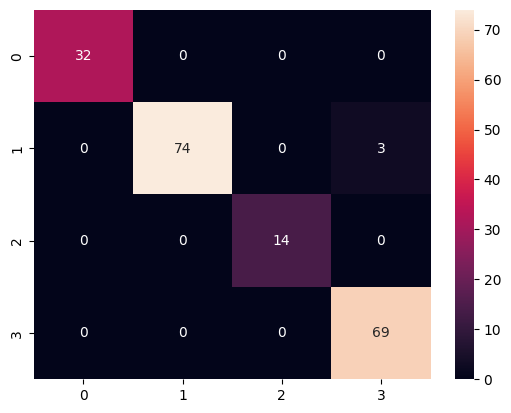

In [89]:
sns.heatmap(LRConfusionMatrx, annot=True)

<Axes: >

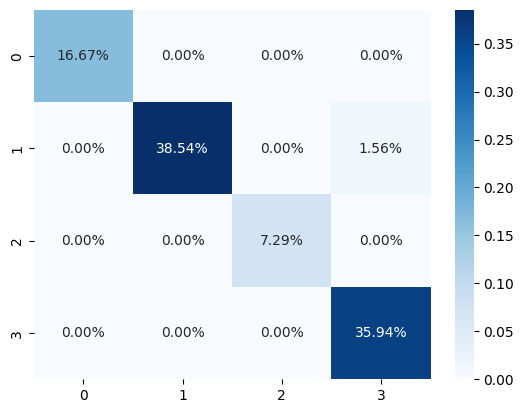

In [90]:
sns.heatmap(LRConfusionMatrx/np.sum(LRConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [91]:
# # Accuracy
LRAccuracyScore = accuracy_score(Anxiety_Y_Test, y_pred)
print(round(LRAccuracyScore,2))

0.98


In [92]:
# # Recall
LRRecallScore = recall_score(Anxiety_Y_Test, y_pred, average='weighted')
print(round(LRRecallScore,2))

0.98


In [93]:
# # Precision
LRPrecisionScore = precision_score(Anxiety_Y_Test, y_pred, average='weighted')
print(round(LRPrecisionScore,2))

0.99


In [94]:
# Root Mean Square Error
LRRMSError = mean_squared_error(Anxiety_Y_Test, y_pred, squared=False)
print(round(LRRMSError,2) )

0.25


## Gaussian Naive Bayes

In [95]:
# instantiate the model (using the default parameters)
Anxiety_NaiveBayes = GaussianNB()

# fit the model with data
Anxiety_NaiveBayes.fit(Anxiety_X_Train,Anxiety_Y_Train)

# Predict the values using the Model
y_pred=Anxiety_NaiveBayes.predict(Anxiety_X_Test)
print(y_pred)

[3. 3. 1. 0. 1. 3. 3. 1. 3. 3. 1. 0. 3. 3. 1. 1. 1. 3. 0. 3. 0. 1. 3. 1.
 0. 0. 3. 1. 1. 1. 1. 3. 0. 1. 1. 3. 3. 1. 1. 3. 3. 0. 0. 3. 2. 1. 0. 2.
 0. 1. 3. 0. 3. 3. 2. 1. 1. 3. 2. 3. 2. 3. 2. 3. 3. 2. 0. 3. 3. 1. 3. 0.
 0. 3. 3. 0. 1. 3. 1. 1. 0. 0. 3. 1. 1. 3. 0. 3. 3. 3. 3. 1. 2. 3. 2. 1.
 3. 1. 1. 0. 3. 1. 1. 3. 0. 1. 3. 1. 3. 3. 3. 2. 3. 1. 3. 3. 3. 3. 3. 3.
 1. 3. 3. 1. 3. 1. 3. 1. 0. 3. 1. 1. 1. 0. 3. 1. 1. 3. 0. 0. 1. 3. 3. 1.
 0. 2. 1. 3. 2. 3. 1. 1. 2. 1. 2. 1. 3. 3. 3. 2. 1. 1. 3. 1. 3. 3. 1. 1.
 3. 2. 3. 1. 1. 3. 1. 0. 3. 0. 3. 3. 3. 3. 3. 0. 1. 0. 1. 1. 3. 3. 3. 1.]


In [96]:
# Confusion Matrix
NaiveBayesConfusionMatrx = confusion_matrix(Anxiety_Y_Test, y_pred)
print(NaiveBayesConfusionMatrx)

[[30  0  2  0]
 [ 0 58  0 19]
 [ 0  0 14  0]
 [ 0  6  0 63]]


<Axes: >

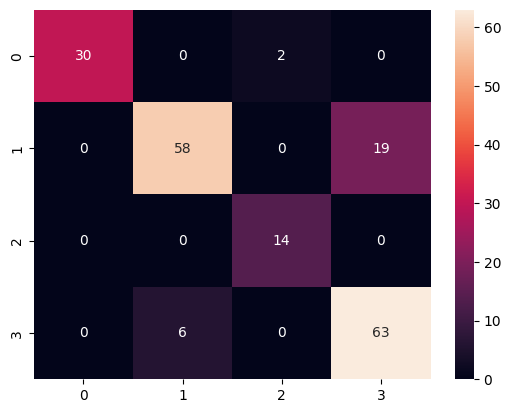

In [97]:
sns.heatmap(NaiveBayesConfusionMatrx, annot=True)

<Axes: >

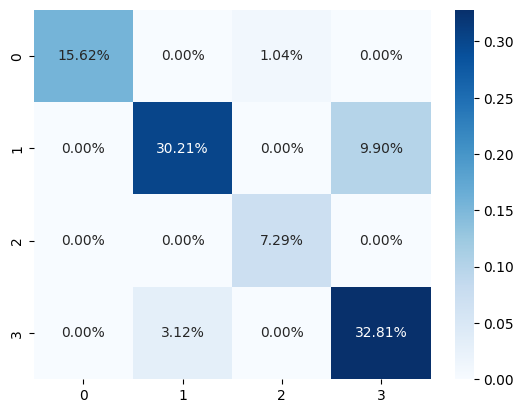

In [98]:
sns.heatmap(NaiveBayesConfusionMatrx/np.sum(NaiveBayesConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [99]:
# # Accuracy
NaiveBayesAccuracyScore = accuracy_score(Anxiety_Y_Test, y_pred)
print(round(NaiveBayesAccuracyScore,2))

0.86


In [100]:
# # Recall
GNBRecallScore = recall_score(Anxiety_Y_Test, y_pred, average='weighted')
print(round(GNBRecallScore,2))

0.86


In [101]:
# # Precision
GNBPrecisionScore = precision_score(Anxiety_Y_Test, y_pred, average='weighted')
print(round(GNBPrecisionScore,2))

0.87


In [102]:
# Root Mean Square Error
GNBRMSError = mean_squared_error(Anxiety_Y_Test, y_pred, squared=False)
print(round(GNBRMSError,2) )

0.75


## K-Nearest Neighbours

10
20
30
40
50
60
70
80
90


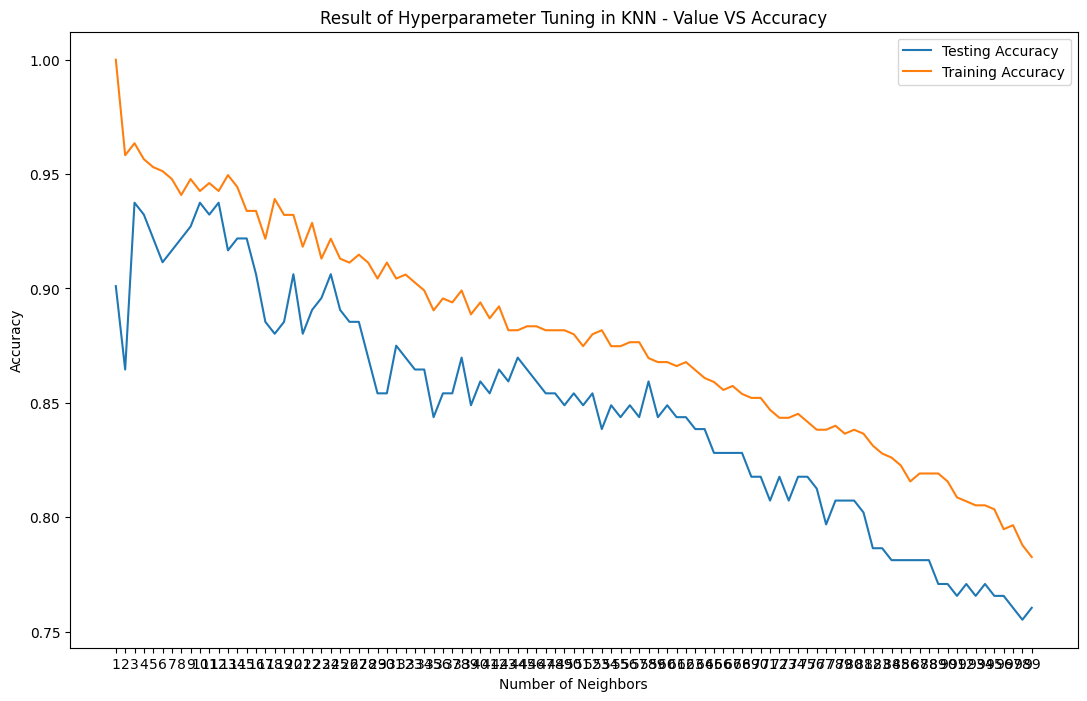

Best accuracy is 0.9375 with K = 3


In [103]:
neig = np.arange(1, 100)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(Anxiety_X_Train,Anxiety_Y_Train)
    #train accuracy
    train_accuracy.append(knn.score(Anxiety_X_Train, Anxiety_Y_Train))
    # test accuracy
    test_accuracy.append(knn.score(Anxiety_X_Test, Anxiety_Y_Test))
    if k%10 == 0:
      print(k)

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Result of Hyperparameter Tuning in KNN - Value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [104]:
# instantiate the model (using the default parameters)
Anxiety_KNN = KNeighborsClassifier(n_neighbors = 1+test_accuracy.index(np.max(test_accuracy)))

# fit the model with data
Anxiety_KNN.fit(Anxiety_X_Train,Anxiety_Y_Train)

# Predict the values using the Model
y_pred=Anxiety_KNN.predict(Anxiety_X_Test)
print(y_pred)

[3. 3. 1. 0. 1. 1. 3. 1. 3. 3. 1. 0. 3. 3. 1. 1. 1. 3. 0. 3. 0. 1. 1. 1.
 0. 0. 3. 3. 1. 1. 1. 3. 0. 1. 1. 3. 3. 1. 1. 1. 3. 0. 0. 3. 1. 1. 0. 2.
 0. 1. 3. 0. 3. 3. 2. 1. 1. 3. 0. 3. 2. 3. 2. 1. 3. 2. 0. 3. 3. 1. 3. 0.
 0. 3. 3. 0. 1. 3. 1. 1. 0. 0. 3. 1. 1. 3. 1. 3. 3. 3. 1. 1. 2. 1. 2. 1.
 3. 1. 1. 0. 3. 1. 3. 3. 0. 1. 3. 1. 1. 3. 3. 2. 3. 1. 3. 3. 3. 3. 3. 3.
 1. 3. 1. 1. 3. 1. 1. 1. 0. 3. 1. 1. 1. 0. 1. 1. 1. 3. 0. 0. 3. 3. 3. 3.
 0. 2. 1. 1. 0. 3. 1. 1. 2. 3. 2. 1. 1. 3. 3. 2. 1. 3. 3. 1. 3. 3. 1. 1.
 3. 2. 1. 1. 1. 3. 1. 0. 3. 0. 3. 1. 3. 3. 3. 0. 1. 2. 3. 1. 3. 3. 3. 1.]


In [105]:
# Confusion Matrix
KNNConfusionMatrx = confusion_matrix(Anxiety_Y_Test, y_pred)
print(KNNConfusionMatrx)

[[29  2  1  0]
 [ 0 70  0  7]
 [ 1  0 13  0]
 [ 0  1  0 68]]


<Axes: >

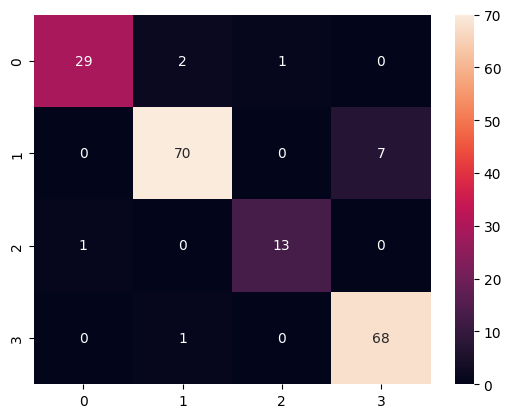

In [106]:
sns.heatmap(KNNConfusionMatrx, annot=True)

<Axes: >

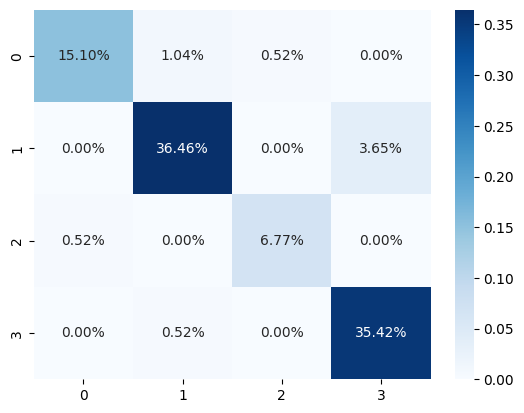

In [107]:
sns.heatmap(KNNConfusionMatrx/np.sum(KNNConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [108]:
# # Accuracy
KNNAccuracyScore = accuracy_score(Anxiety_Y_Test, y_pred)
print(KNNAccuracyScore)

0.9375


In [109]:
# # Recall
KNNRecallScore = recall_score(Anxiety_Y_Test, y_pred, average='weighted')
print(KNNRecallScore)

0.9375


In [110]:
# # Precision
KNNPrecisionScore = precision_score(Anxiety_Y_Test, y_pred, average='weighted')
print(KNNPrecisionScore)

0.9392132800608827


In [111]:
# Root Mean Square Error
KNNRMSError = mean_squared_error(Anxiety_Y_Test, y_pred, squared=False)
print(KNNRMSError)

0.4677072


## Support Vector Classifier

In [112]:
# instantiate the model (using the default parameters)
Anxiety_SupportVectorClassifier = SVC()

# fit the model with data
Anxiety_SupportVectorClassifier.fit(Anxiety_X_Train,Anxiety_Y_Train)

# Predict the values using the Model
y_pred=Anxiety_SupportVectorClassifier.predict(Anxiety_X_Test)
print(y_pred)

[3. 3. 1. 0. 1. 1. 3. 1. 3. 3. 1. 0. 3. 1. 1. 1. 1. 3. 0. 3. 0. 1. 1. 1.
 0. 0. 3. 1. 1. 1. 1. 3. 0. 1. 1. 3. 3. 1. 1. 1. 3. 0. 0. 3. 1. 1. 2. 0.
 0. 1. 3. 0. 3. 3. 2. 1. 1. 3. 2. 3. 0. 3. 2. 3. 3. 2. 0. 3. 3. 1. 3. 0.
 0. 3. 3. 0. 1. 3. 1. 1. 0. 0. 3. 1. 1. 3. 0. 3. 3. 3. 3. 1. 2. 3. 2. 1.
 3. 1. 1. 0. 3. 1. 3. 3. 0. 1. 3. 1. 1. 3. 3. 2. 3. 3. 3. 3. 3. 3. 3. 3.
 1. 3. 1. 1. 1. 3. 1. 1. 0. 3. 1. 1. 1. 0. 1. 1. 1. 3. 0. 0. 3. 3. 3. 3.
 1. 2. 1. 3. 2. 3. 1. 1. 2. 3. 2. 1. 1. 3. 1. 2. 1. 3. 3. 3. 3. 3. 1. 1.
 3. 2. 1. 1. 1. 3. 1. 0. 3. 0. 3. 3. 3. 3. 3. 0. 1. 0. 3. 1. 3. 3. 3. 1.]


In [113]:
# Confusion Matrix
SVCConfusionMatrx = confusion_matrix(Anxiety_Y_Test, y_pred)
print(SVCConfusionMatrx)

[[28  2  2  0]
 [ 0 67  0 10]
 [ 2  0 12  0]
 [ 0  0  0 69]]


<Axes: >

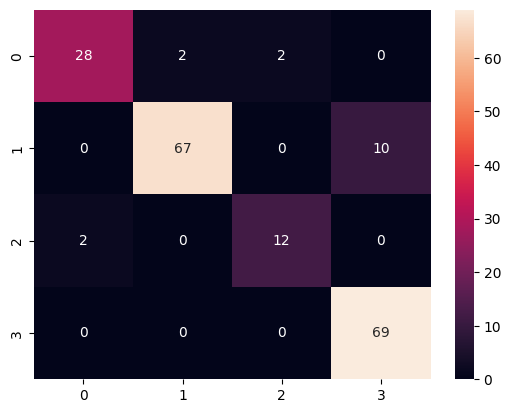

In [114]:
sns.heatmap(SVCConfusionMatrx, annot=True)

<Axes: >

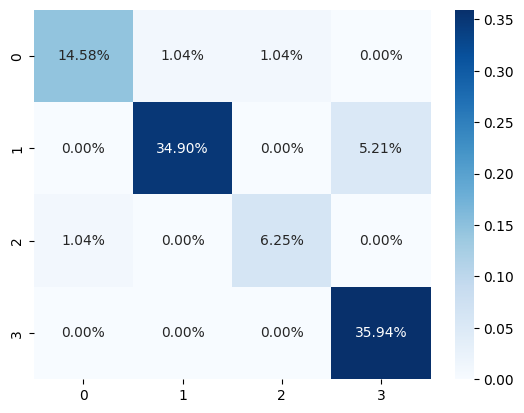

In [115]:
sns.heatmap(SVCConfusionMatrx/np.sum(SVCConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [116]:
# Accuracy
SVCAccuracyScore = accuracy_score(Anxiety_Y_Test, y_pred)
print(SVCAccuracyScore.round(2))

0.92


In [117]:
# Recall
SVCRecallScore = recall_score(Anxiety_Y_Test, y_pred, average='weighted')
print(SVCRecallScore.round(2))

0.92


In [118]:
# Precision
SVCPrecisionScore = precision_score(Anxiety_Y_Test, y_pred, average='weighted')
print(SVCPrecisionScore)

0.9213573197578425


In [119]:
# Root Mean Square Error
SVCRMSError = mean_squared_error(Anxiety_Y_Test, y_pred, squared=False)
print(SVCRMSError)

0.5496211


## Decision Tree

In [120]:
# instantiate the model (using the default parameters)
Anxiety_DT = DecisionTreeClassifier(max_depth=2)

# fit the model with data
Anxiety_DT.fit(Anxiety_X_Train,Anxiety_Y_Train)

y_pred=Anxiety_DT.predict(Anxiety_X_Test)
print(y_pred)

[3. 3. 1. 0. 1. 1. 3. 1. 3. 3. 1. 0. 3. 1. 1. 1. 1. 3. 0. 3. 0. 1. 1. 1.
 0. 0. 3. 1. 1. 1. 1. 3. 0. 1. 1. 3. 3. 1. 1. 1. 3. 0. 0. 3. 0. 1. 0. 0.
 0. 1. 3. 0. 3. 3. 0. 1. 1. 1. 0. 3. 0. 3. 0. 1. 3. 0. 0. 3. 3. 1. 3. 0.
 0. 3. 3. 0. 1. 3. 1. 1. 0. 0. 3. 1. 1. 3. 0. 3. 3. 3. 1. 1. 0. 1. 0. 1.
 3. 1. 1. 0. 3. 1. 3. 3. 0. 1. 3. 1. 1. 3. 3. 0. 3. 1. 3. 3. 3. 3. 3. 3.
 1. 1. 1. 1. 1. 3. 1. 1. 0. 3. 1. 1. 1. 0. 1. 1. 1. 3. 0. 0. 3. 3. 3. 3.
 0. 0. 1. 1. 0. 3. 1. 1. 0. 1. 0. 1. 1. 3. 1. 0. 1. 3. 3. 1. 3. 3. 1. 1.
 3. 0. 1. 1. 1. 3. 1. 0. 3. 0. 3. 1. 3. 3. 3. 0. 1. 0. 3. 1. 3. 3. 3. 1.]


In [121]:
# Confusion Matrix
DTConfusionMatrx = confusion_matrix(Anxiety_Y_Test, y_pred)
print(DTConfusionMatrx)

[[32  0  0  0]
 [ 0 77  0  0]
 [14  0  0  0]
 [ 0  0  0 69]]


<Axes: >

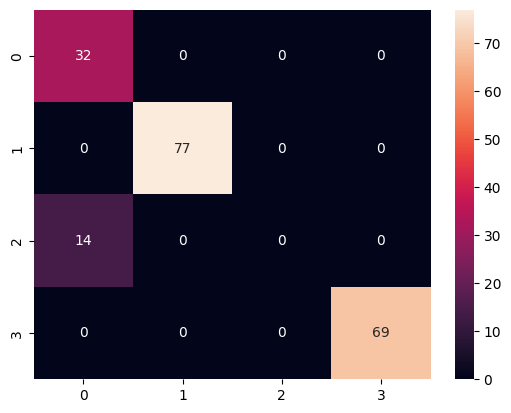

In [122]:
sns.heatmap(DTConfusionMatrx, annot=True)

<Axes: >

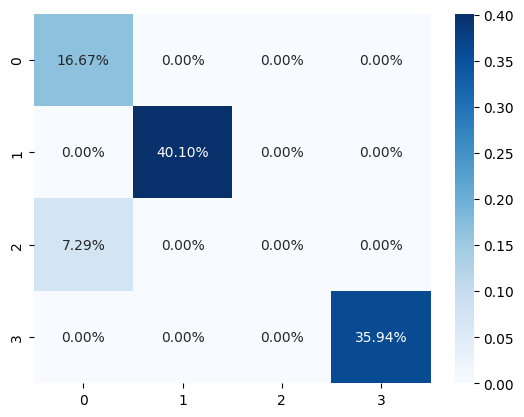

In [123]:
sns.heatmap(DTConfusionMatrx/np.sum(DTConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [124]:
# Accuracy
DTAccuracyScore = accuracy_score(Anxiety_Y_Test, y_pred)
print(DTAccuracyScore)

0.9270833333333334


In [125]:
# Recall
DTRecallScore = recall_score(Anxiety_Y_Test, y_pred, average='weighted')
print(DTRecallScore)

0.9270833333333334


In [126]:
# Precision
DTPrecisionScore = precision_score(Anxiety_Y_Test, y_pred, average='weighted')
print(DTPrecisionScore)

0.8763586956521738


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
# Root Mean Square Error
DTRMSError = mean_squared_error(Anxiety_Y_Test, y_pred, squared=False)
print(DTRMSError)

0.5400617


## Random Forest

In [128]:
# instantiate the model (using the default parameters)
Anxiety_RFClassifier = RandomForestClassifier(n_estimators=3)

# fit the model with data
Anxiety_RFClassifier.fit(Anxiety_X_Train, Anxiety_Y_Train)

# Predict the values using the Model
y_pred = Anxiety_RFClassifier.predict(Anxiety_X_Test)

In [129]:
# Confusion Matrix
RFConfusionMatrx = confusion_matrix(Anxiety_Y_Test, y_pred)
print(RFConfusionMatrx)

[[30  0  2  0]
 [ 0 77  0  0]
 [ 4  0 10  0]
 [ 0  0  0 69]]


<Axes: >

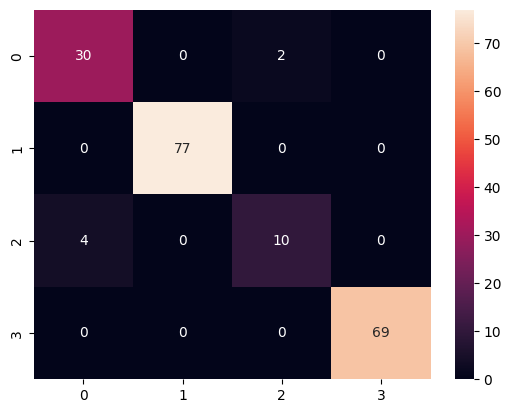

In [130]:
sns.heatmap(RFConfusionMatrx, annot=True)

<Axes: >

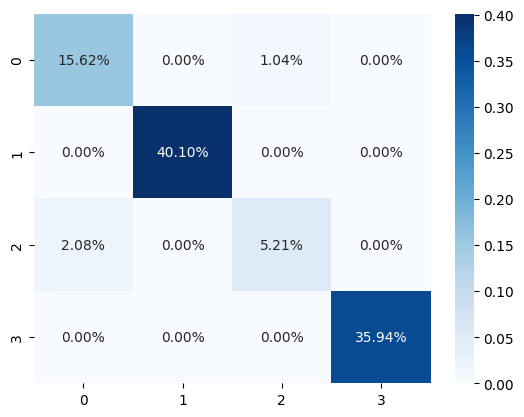

In [131]:
sns.heatmap(RFConfusionMatrx/np.sum(RFConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [132]:
# Accuracy
RFAccuracyScore = accuracy_score(Anxiety_Y_Test, y_pred)
print(RFAccuracyScore)

0.96875


In [133]:
# Recall
RFRecallScore = recall_score(Anxiety_Y_Test, y_pred, average='weighted')
print(RFRecallScore)

0.96875


In [134]:
# Precision
RFPrecisionScore = precision_score(Anxiety_Y_Test, y_pred, average='weighted')
print(RFPrecisionScore)

0.9682393790849674


In [135]:
# Root Mean Square Error
RFRMSError = mean_squared_error(Anxiety_Y_Test, y_pred, squared=False)
print(RFRMSError)

0.35355338


## Evaluating model performance

In [136]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable()

myTable.title = 'Results for method Foo'
myTable.field_names = ["Name of Model", "Accuracy", "Error Rate", "Precision", "Recall"]

# myTable.title = 'Results for evaluation Parameters when Anxiety dataset is used'
# myTable = PrettyTable()

myTable.add_row(["LR", round(LRAccuracyScore,3), round(1 - LRAccuracyScore, 3), round(LRPrecisionScore,3), round(LRRecallScore,3),  ])
myTable.add_row(["GNB", round(NaiveBayesAccuracyScore,3), round(1 - NaiveBayesAccuracyScore,3), round(GNBPrecisionScore,3), round(GNBRecallScore,3) ])
myTable.add_row(["KNN", round(KNNAccuracyScore,3), round(1 - KNNAccuracyScore,3), round(KNNPrecisionScore,3), round(KNNRecallScore,3)])
myTable.add_row(["SVC", round(SVCAccuracyScore,3), round(1 - SVCAccuracyScore,3), round(SVCPrecisionScore,3), round(SVCRecallScore,3) ])
myTable.add_row(["DT", round(DTAccuracyScore,3), round(1 - DTAccuracyScore,3) , round(DTPrecisionScore,3), round(DTRecallScore,3) ])
myTable.add_row(["RF", round(RFAccuracyScore,3), round(1 - RFAccuracyScore,3) , round(RFPrecisionScore,3), round(RFRecallScore,3) ])

print(myTable)
# print(myTable1)

+---------------+----------+------------+-----------+--------+
| Name of Model | Accuracy | Error Rate | Precision | Recall |
+---------------+----------+------------+-----------+--------+
|       LR      |  0.984   |   0.016    |   0.985   | 0.984  |
|      GNB      |  0.859   |   0.141    |    0.87   | 0.859  |
|      KNN      |  0.938   |   0.062    |   0.939   | 0.938  |
|      SVC      |  0.917   |   0.083    |   0.921   | 0.917  |
|       DT      |  0.927   |   0.073    |   0.876   | 0.927  |
|       RF      |  0.969   |   0.031    |   0.968   | 0.969  |
+---------------+----------+------------+-----------+--------+


# Stress Predictions

## Importing the dataset and Data Preprocessing


In [137]:
dataset = pd.read_csv('Dataset - depression.csv')
stressDataset = dataset.copy()

In [138]:
stressDataset

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,...,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,stress_severity,stressfulness,stress_diagnosis,stress_treatment,pss_score
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,...,True,False,False,7,False,Moderate,True,False,False,14
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,...,False,False,False,14,True,Mild,False,False,False,28
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,...,False,False,False,6,False,Mild,False,False,False,12
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,...,True,False,False,11,True,Severe,True,False,False,22
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,...,True,False,False,3,False,Moderate,True,False,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,763,4,24,female,21.096191,Normal,6,Mild,False,False,...,False,False,False,3,False,Mild,False,False,False,8
763,764,4,22,male,25.308642,Overweight,4,None-minimal,False,False,...,False,False,False,3,False,None-minimal,False,False,False,2
764,765,4,22,male,22.720438,Normal,2,None-minimal,False,False,...,False,False,False,4,False,None-minimal,False,False,False,12
765,766,4,22,female,23.033168,Normal,17,Moderately severe,True,False,...,True,False,False,15,True,Moderately severe,True,False,False,10


In [139]:
# Dropping columns

stressDataset.drop(['id', 'school_year','depression_severity','depressiveness',
                        'depression_diagnosis','depression_treatment','gad_score',
                        'anxiety_severity', 'anxiousness', 'anxiety_diagnosis','anxiety_treatment',
                        ],
           axis=1,inplace=True)

In [140]:
stressDataset.head()

,age,gender,bmi,who_bmi,phq_score,suicidal,epworth_score,sleepiness,stress_severity,stressfulness,stress_diagnosis,stress_treatment,pss_score
0,19,male,33.333333,Class I Obesity,9,False,7,False,Moderate,True,False,False,14
1,18,male,19.841270,Normal,8,False,14,True,Mild,False,False,False,28
2,19,male,25.102391,Overweight,8,False,6,False,Mild,False,False,False,12
3,18,female,23.738662,Normal,19,True,11,True,Severe,True,False,False,22
4,18,male,25.617284,Overweight,6,False,3,False,Moderate,True,False,False,6


In [141]:
stressDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               767 non-null    int64  
 1   gender            767 non-null    object 
 2   bmi               767 non-null    float64
 3   who_bmi           767 non-null    object 
 4   phq_score         767 non-null    int64  
 5   suicidal          767 non-null    bool   
 6   epworth_score     767 non-null    int64  
 7   sleepiness        767 non-null    bool   
 8   stress_severity   767 non-null    object 
 9   stressfulness     767 non-null    bool   
 10  stress_diagnosis  767 non-null    bool   
 11  stress_treatment  767 non-null    bool   
 12  pss_score         767 non-null    int64  
dtypes: bool(5), float64(1), int64(4), object(3)
memory usage: 51.8+ KB


In [142]:
percent_missing = stressDataset.isnull().sum() * 100 / len(stressDataset)
missing_value_df = pd.DataFrame({
                                 'percent_missing': percent_missing})
missing_value_df

,percent_missing
age,0.0
gender,0.0
bmi,0.0
who_bmi,0.0
phq_score,0.0
suicidal,0.0
epworth_score,0.0
sleepiness,0.0
stress_severity,0.0
stressfulness,0.0


In [143]:
print("Unique values of gender: ",stressDataset["gender"].unique())
print("Unique values of who_bmi: ",stressDataset["who_bmi"].unique())
print("Unique values of suicidal: ",stressDataset["suicidal"].unique())
print("Unique values of stressfulness: ",stressDataset["stressfulness"].unique())
print("Unique values of stress_diagnosis: ",stressDataset["stress_diagnosis"].unique())
print("Unique values of sleepiness: ",stressDataset["sleepiness"].unique())
print("Unique values of stress_treatment: ",stressDataset["stress_treatment"].unique())

print("Unique values of stress_severity: ",stressDataset["stress_severity"].unique())

Unique values of gender:  ['male' 'female']
Unique values of who_bmi:  ['Class I Obesity' 'Normal' 'Overweight' 'Not Availble'
 'Class III Obesity' 'Underweight' 'Class II Obesity']
Unique values of suicidal:  [False  True]
Unique values of stressfulness:  [ True False]
Unique values of stress_diagnosis:  [False  True]
Unique values of sleepiness:  [False  True]
Unique values of stress_treatment:  [False  True]
Unique values of stress_severity:  ['Moderate' 'Mild' 'Severe' 'None-minimal' 'Moderately severe' 'none']


In [144]:
stressDataset.isna().sum()

age                 0
gender              0
bmi                 0
who_bmi             0
phq_score           0
suicidal            0
epworth_score       0
sleepiness          0
stress_severity     0
stressfulness       0
stress_diagnosis    0
stress_treatment    0
pss_score           0
dtype: int64

In [145]:
stressDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               767 non-null    int64  
 1   gender            767 non-null    object 
 2   bmi               767 non-null    float64
 3   who_bmi           767 non-null    object 
 4   phq_score         767 non-null    int64  
 5   suicidal          767 non-null    bool   
 6   epworth_score     767 non-null    int64  
 7   sleepiness        767 non-null    bool   
 8   stress_severity   767 non-null    object 
 9   stressfulness     767 non-null    bool   
 10  stress_diagnosis  767 non-null    bool   
 11  stress_treatment  767 non-null    bool   
 12  pss_score         767 non-null    int64  
dtypes: bool(5), float64(1), int64(4), object(3)
memory usage: 51.8+ KB


In [146]:
# Percentage of samples remove during pre-processing
print("Original Number of samples:", len(dataset))
print("Number of samples after preprocessing:", len(stressDataset))

print("Number of samples removed during preprocessing:", len(dataset) - len(stressDataset))
print("Percentage of samples removed during preprocessing:", round((((len(dataset) - (len(stressDataset)))/len(dataset))*100),2))

Original Number of samples: 767
Number of samples after preprocessing: 767
Number of samples removed during preprocessing: 0
Percentage of samples removed during preprocessing: 0.0


## Processing the dataset

In [147]:
Encode_Depression_Data = stressDataset.copy()

'''
Unique values of gender:  ['male' 'female']
Unique values of who_bmi:  ['Class I Obesity' 'Normal' 'Overweight' 'Not Availble'
 'Class III Obesity' 'Underweight' 'Class II Obesity']
Unique values of suicidal:  [False  True]
Unique values of stressfulness:  [ True False]
Unique values of stress_diagnosis:  [False  True]
Unique values of sleepiness:  [False  True]
Unique values of stress_treatment:  [False  True]
Unique values of stress_severity:  ['Moderate' 'Mild' 'Severe' 'None-minimal' 'Moderately severe' 'none']
'''

# Gender
'''
female: 0
male: 1
'''
Encode_Depression_Data["gender"]=[1 if i.strip()== "male"
                       else 0 for i in Encode_Depression_Data["gender"]]

# who_bmi
'''
Class I Obesity: 0
Normal: 1
Overweight: 2
Not Availble: 3
Class III Obesity: 4
Class II Obesity: 5
'''
Encode_Depression_Data["who_bmi"]=[1 if i.strip()== "Normal"
                                else 0 if i.strip() == "Class I Obesity"
                               else 2 if i.strip()=="Overweight"
                               else 3 if i.strip()=="Not Availble"
                               else 4 if i.strip()=="Class III Obesity"
                               else 5 for i in Encode_Depression_Data["who_bmi"]]

# stressfulness
'''
False: 0
True: 1
'''
Encode_Depression_Data["stressfulness"]=[1 if i == True
                       else 0 for i in Encode_Depression_Data["stressfulness"]]

# suicidal
'''
False: 0
True: 1
'''
Encode_Depression_Data["suicidal"]=[1 if i == True
                       else 0 for i in Encode_Depression_Data["suicidal"]]

# stress_diagnosis
'''
False: 0
True: 1
'''
Encode_Depression_Data["stress_diagnosis"]=[1 if i == True
                       else 0 for i in Encode_Depression_Data["stress_diagnosis"]]

# stress_treatment
'''
False: 0
True: 1
'''
Encode_Depression_Data["stress_treatment"]=[1 if i == True
                       else 0 for i in Encode_Depression_Data["stress_treatment"]]

# sleepiness
'''
False: 0
True: 1
'''
Encode_Depression_Data["sleepiness"]=[1 if i == True
                       else 0 for i in Encode_Depression_Data["sleepiness"]]

# stress_severity
'''
Moderate: 0
Mild: 1
Severe:2
None-minimal: 3
Moderately severe: 4
none: 5
'''
Encode_Depression_Data["stress_severity"]=[1 if i.strip()== "Mild"
                                          else 0 if i.strip() == "Moderate"
                                          else 2 if i.strip()=="Severe"
                                          else 3 if i.strip()=="None-minimal"
                                          else 4 if i.strip()=="Moderately severe"
                                          else 5 for i in Encode_Depression_Data["stress_severity"]]


Encoded_Dataset = Encode_Depression_Data.astype("float32")

In [148]:
Encoded_Dataset.head()

,age,gender,bmi,who_bmi,phq_score,suicidal,epworth_score,sleepiness,stress_severity,stressfulness,stress_diagnosis,stress_treatment,pss_score
0,19.0,1.0,33.333332,0.0,9.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,14.0
1,18.0,1.0,19.841270,1.0,8.0,0.0,14.0,1.0,1.0,0.0,0.0,0.0,28.0
2,19.0,1.0,25.102392,2.0,8.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,12.0
3,18.0,0.0,23.738663,1.0,19.0,1.0,11.0,1.0,2.0,1.0,0.0,0.0,22.0
4,18.0,1.0,25.617285,2.0,6.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,6.0


## Splitting the dataset into the Training set and Test set

In [149]:
Stress_X =  Encoded_Dataset.drop("stress_severity",axis=1)
Stress_Y = Encoded_Dataset["stress_severity"]

In [150]:
print(Stress_X)

      age  gender        bmi  who_bmi  phq_score  suicidal  epworth_score  \
0    19.0     1.0  33.333332      0.0        9.0       0.0            7.0   
1    18.0     1.0  19.841270      1.0        8.0       0.0           14.0   
2    19.0     1.0  25.102392      2.0        8.0       0.0            6.0   
3    18.0     0.0  23.738663      1.0       19.0       1.0           11.0   
4    18.0     1.0  25.617285      2.0        6.0       0.0            3.0   
..    ...     ...        ...      ...        ...       ...            ...   
762  24.0     0.0  21.096191      1.0        6.0       0.0            3.0   
763  22.0     1.0  25.308641      2.0        4.0       0.0            3.0   
764  22.0     1.0  22.720438      1.0        2.0       0.0            4.0   
765  22.0     0.0  23.033167      1.0       17.0       0.0           15.0   
766  22.0     1.0  22.598141      1.0        6.0       0.0            0.0   

     sleepiness  stressfulness  stress_diagnosis  stress_treatment  pss_sco

In [151]:
print(Stress_Y)

0      0.0
1      1.0
2      1.0
3      2.0
4      0.0
      ... 
762    1.0
763    3.0
764    3.0
765    4.0
766    1.0
Name: stress_severity, Length: 767, dtype: float32


In [152]:
Stress_X_Train,Stress_X_Test,Stress_Y_Train,Stress_Y_Test = train_test_split(Stress_X,Stress_Y,test_size=0.25,random_state=42)

## Logistic Regression

In [153]:
# instantiate the model (using the default parameters)

Stress_logreg = LogisticRegression(max_iter=100000)

# fit the model with data
Stress_logreg.fit(Stress_X_Train,Stress_Y_Train)

# Predict the values using the Model
y_pred=Stress_logreg.predict(Stress_X_Test)
print(y_pred)

[3. 3. 1. 1. 1. 3. 3. 0. 1. 3. 3. 3. 4. 1. 3. 3. 1. 3. 0. 3. 3. 3. 0. 1.
 4. 1. 3. 1. 3. 0. 1. 3. 1. 0. 3. 1. 1. 1. 3. 3. 1. 3. 3. 3. 1. 1. 0. 3.
 0. 3. 1. 4. 3. 2. 3. 1. 3. 0. 1. 0. 1. 3. 0. 1. 3. 3. 4. 3. 1. 0. 1. 3.
 3. 1. 3. 3. 3. 3. 3. 3. 1. 0. 3. 3. 1. 3. 1. 3. 1. 1. 1. 1. 3. 0. 0. 0.
 3. 3. 1. 3. 1. 3. 2. 4. 3. 3. 2. 3. 1. 0. 0. 3. 1. 0. 1. 1. 2. 1. 4. 3.
 0. 1. 0. 3. 1. 1. 3. 1. 3. 3. 1. 3. 1. 3. 3. 0. 3. 1. 1. 3. 0. 3. 3. 3.
 3. 0. 1. 0. 3. 0. 1. 0. 1. 1. 3. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 3.
 3. 1. 3. 3. 3. 1. 1. 1. 0. 3. 3. 1. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 3. 1.]


In [154]:
# Confusion Matrix
LRConfusionMatrx = confusion_matrix(Stress_Y_Test, y_pred)
print(LRConfusionMatrx)

[[25  9  1  1  1  0]
 [ 1 45  1 19  0  0]
 [ 6  0  1  0  3  0]
 [ 0 16  0 58  0  0]
 [ 0  0  1  0  2  0]
 [ 0  0  0  2  0  0]]


<Axes: >

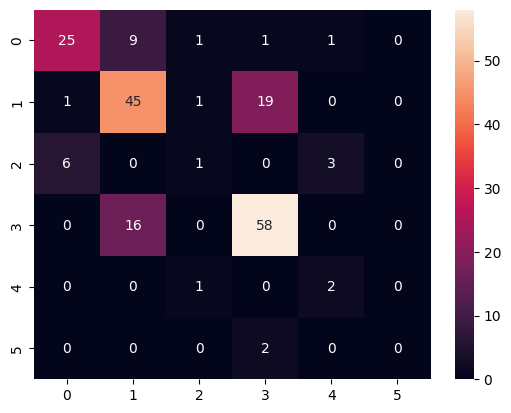

In [155]:
sns.heatmap(LRConfusionMatrx, annot=True)

<Axes: >

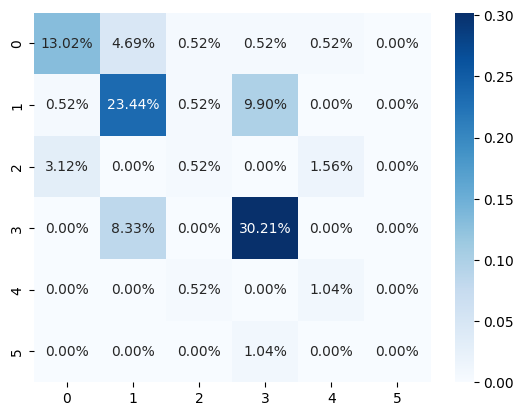

In [156]:
sns.heatmap(LRConfusionMatrx/np.sum(LRConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [157]:
# # Accuracy
LRAccuracyScore = accuracy_score(Stress_Y_Test, y_pred)
print(round(LRAccuracyScore,2))

0.68


In [158]:
# # Recall
LRRecallScore = recall_score(Stress_Y_Test, y_pred, average='weighted')
print(round(LRRecallScore,2))

0.68


In [159]:
# # Precision
LRPrecisionScore = precision_score(Stress_Y_Test, y_pred, average='weighted')
print(round(LRPrecisionScore,2))

0.67


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [160]:
# Root Mean Square Error
LRRMSError = mean_squared_error(Stress_Y_Test, y_pred, squared=False)
print(round(LRRMSError,2) )

1.09


## Gaussian Naive Bayes

In [161]:
# instantiate the model (using the default parameters)
Stress_NaiveBayes = GaussianNB()

# fit the model with data
Stress_NaiveBayes.fit(Stress_X_Train,Stress_Y_Train)

# Predict the values using the Model
y_pred=Stress_NaiveBayes.predict(Stress_X_Test)
print(y_pred)

[3. 0. 1. 3. 1. 3. 3. 0. 1. 3. 3. 5. 4. 0. 3. 3. 3. 3. 2. 3. 5. 3. 0. 3.
 4. 0. 3. 3. 3. 0. 1. 3. 3. 0. 3. 1. 3. 2. 3. 3. 3. 0. 0. 3. 3. 3. 0. 3.
 1. 3. 1. 2. 3. 4. 3. 1. 3. 0. 3. 0. 3. 3. 0. 1. 3. 0. 2. 3. 1. 0. 3. 3.
 3. 1. 0. 3. 3. 3. 3. 3. 1. 0. 3. 3. 1. 3. 3. 3. 1. 1. 1. 3. 3. 0. 0. 0.
 3. 3. 3. 3. 3. 0. 4. 1. 3. 3. 2. 3. 1. 0. 0. 3. 1. 0. 3. 3. 2. 1. 2. 3.
 1. 1. 0. 5. 1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 3. 1. 1. 1. 2. 3. 5. 3.
 3. 1. 3. 0. 3. 0. 3. 0. 3. 3. 0. 3. 0. 1. 0. 0. 4. 0. 3. 0. 1. 3. 1. 3.
 0. 1. 3. 3. 3. 3. 3. 1. 1. 3. 3. 3. 3. 3. 3. 3. 1. 3. 3. 3. 1. 1. 3. 3.]


In [162]:
# Confusion Matrix
NaiveBayesConfusionMatrx = confusion_matrix(Stress_Y_Test, y_pred)
print(NaiveBayesConfusionMatrx)

[[20 13  3  0  1  0]
 [ 4 13  1 46  1  1]
 [ 6  0  3  0  1  0]
 [ 6 10  0 57  0  1]
 [ 0  0  1  0  2  0]
 [ 0  0  0  0  0  2]]


<Axes: >

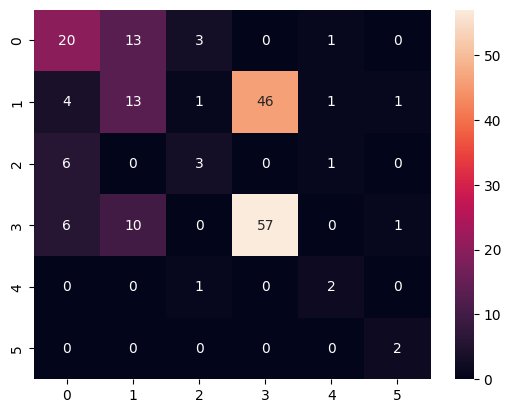

In [163]:
sns.heatmap(NaiveBayesConfusionMatrx, annot=True)

<Axes: >

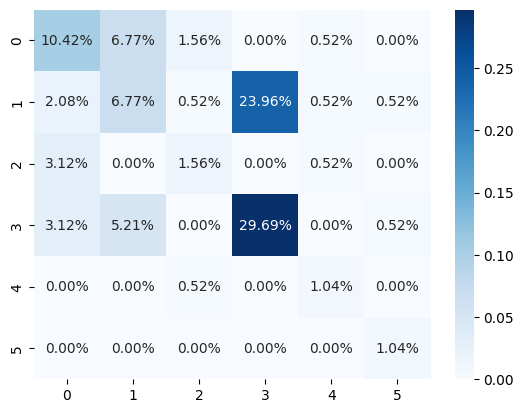

In [164]:
sns.heatmap(NaiveBayesConfusionMatrx/np.sum(NaiveBayesConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [165]:
# # Accuracy
NaiveBayesAccuracyScore = accuracy_score(Stress_Y_Test, y_pred)
print(round(NaiveBayesAccuracyScore,2))

0.51


In [166]:
# # Recall
GNBRecallScore = recall_score(Stress_Y_Test, y_pred, average='weighted')
print(round(GNBRecallScore,2))

0.51


In [167]:
# # Precision
GNBPrecisionScore = precision_score(Stress_Y_Test, y_pred, average='weighted')
print(round(GNBPrecisionScore,2))

0.48


In [168]:
# Root Mean Square Error
GNBRMSError = mean_squared_error(Stress_Y_Test, y_pred, squared=False)
print(round(GNBRMSError,2) )

1.42


## K-Nearest Neighbours

10
20
30
40
50
60
70
80
90


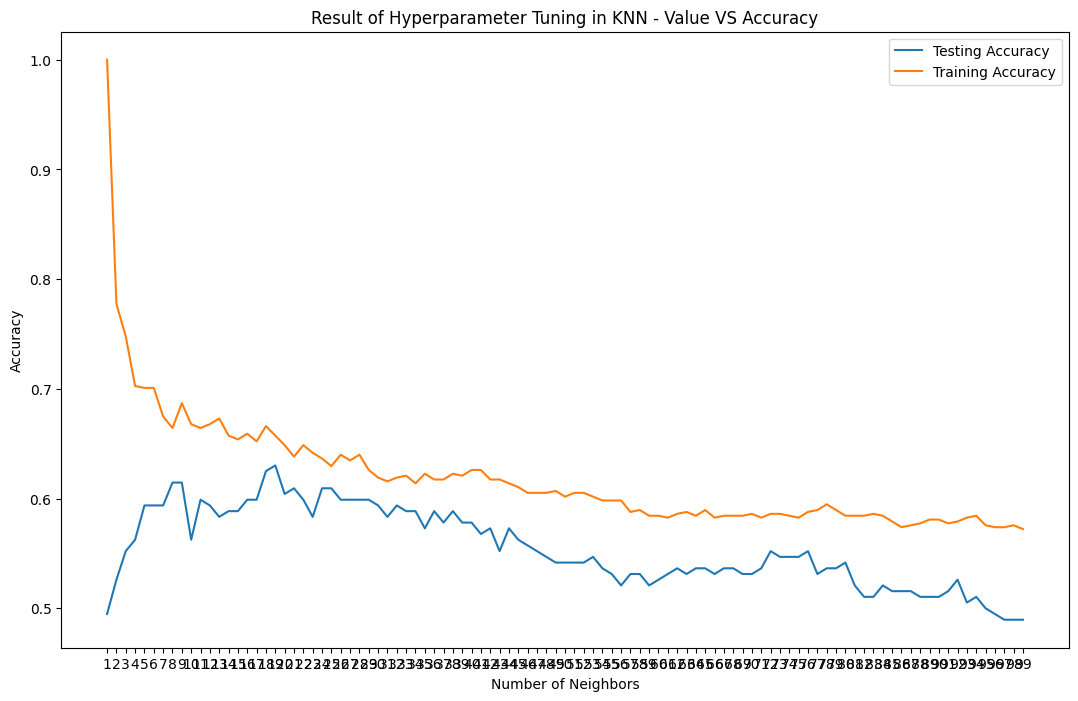

Best accuracy is 0.6302083333333334 with K = 19


In [169]:
neig = np.arange(1, 100)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(Stress_X_Train,Stress_Y_Train)
    #train accuracy
    train_accuracy.append(knn.score(Stress_X_Train, Stress_Y_Train))
    # test accuracy
    test_accuracy.append(knn.score(Stress_X_Test, Stress_Y_Test))
    if k%10 == 0:
      print(k)

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Result of Hyperparameter Tuning in KNN - Value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [170]:
# instantiate the model (using the default parameters)
Stress_KNN = KNeighborsClassifier(n_neighbors = 1+test_accuracy.index(np.max(test_accuracy)))

# fit the model with data
Stress_KNN.fit(Stress_X_Train,Stress_Y_Train)

# Predict the values using the Model
y_pred=Stress_KNN.predict(Stress_X_Test)
print(y_pred)

[3. 3. 1. 1. 0. 3. 3. 0. 1. 1. 3. 3. 4. 1. 3. 3. 1. 3. 0. 3. 3. 3. 0. 1.
 4. 1. 1. 1. 1. 0. 1. 3. 1. 1. 3. 1. 1. 1. 3. 3. 1. 3. 3. 3. 1. 1. 3. 3.
 0. 3. 1. 0. 3. 1. 3. 0. 3. 1. 1. 1. 1. 3. 1. 0. 3. 3. 4. 3. 1. 1. 1. 3.
 3. 1. 3. 3. 3. 3. 3. 3. 1. 3. 3. 1. 1. 3. 1. 3. 1. 1. 1. 1. 3. 0. 1. 0.
 3. 3. 1. 3. 1. 3. 0. 1. 3. 3. 3. 3. 1. 1. 1. 3. 1. 0. 1. 1. 4. 1. 0. 3.
 0. 3. 3. 3. 1. 1. 1. 1. 3. 3. 1. 3. 1. 3. 3. 0. 3. 1. 0. 1. 1. 3. 3. 3.
 1. 0. 1. 1. 3. 0. 1. 1. 1. 1. 3. 3. 1. 0. 0. 1. 0. 0. 1. 1. 3. 3. 1. 3.
 3. 0. 1. 3. 3. 1. 1. 0. 4. 3. 1. 1. 3. 3. 3. 1. 1. 1. 1. 1. 0. 1. 3. 1.]


In [171]:
# Confusion Matrix
KNNConfusionMatrx = confusion_matrix(Stress_Y_Test, y_pred)
print(KNNConfusionMatrx)

[[16 16  0  4  1  0]
 [ 3 47  0 16  0  0]
 [ 4  4  0  1  1  0]
 [ 3 16  0 55  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  2  0  0]]


<Axes: >

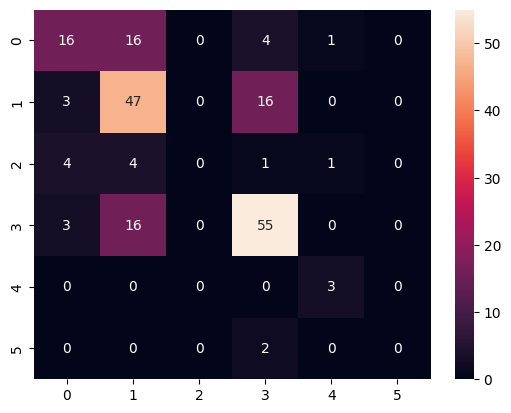

In [172]:
sns.heatmap(KNNConfusionMatrx, annot=True)

<Axes: >

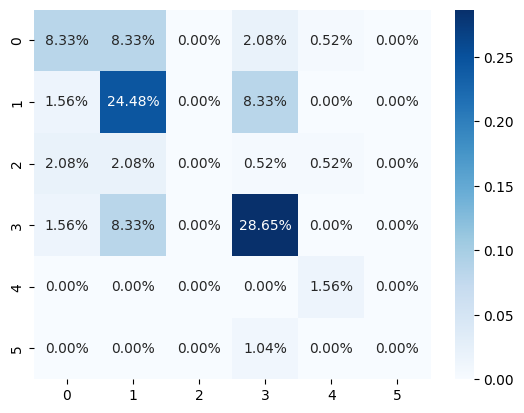

In [173]:
sns.heatmap(KNNConfusionMatrx/np.sum(KNNConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [174]:
# # Accuracy
KNNAccuracyScore = accuracy_score(Stress_Y_Test, y_pred)
print(KNNAccuracyScore)

0.6302083333333334


In [175]:
# # Recall
KNNRecallScore = recall_score(Stress_Y_Test, y_pred, average='weighted')
print(KNNRecallScore)

0.6302083333333334


In [176]:
# # Precision
KNNPrecisionScore = precision_score(Stress_Y_Test, y_pred, average='weighted')
print(KNNPrecisionScore)

0.5943865204407374


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [177]:
# Root Mean Square Error
KNNRMSError = mean_squared_error(Stress_Y_Test, y_pred, squared=False)
print(KNNRMSError)

1.1614467


## Support Vector Classifier

In [178]:
# instantiate the model (using the default parameters)
Stress_SupportVectorClassifier = SVC()

# fit the model with data
Stress_SupportVectorClassifier.fit(Stress_X_Train,Stress_Y_Train)

# Predict the values using the Model
y_pred=Stress_SupportVectorClassifier.predict(Stress_X_Test)
print(y_pred)

[3. 3. 1. 1. 1. 3. 3. 1. 1. 3. 3. 3. 4. 1. 3. 3. 1. 3. 0. 3. 3. 3. 1. 1.
 4. 1. 3. 3. 3. 1. 1. 3. 1. 1. 3. 1. 1. 1. 3. 3. 1. 3. 3. 3. 1. 1. 3. 3.
 0. 3. 1. 0. 3. 0. 3. 1. 3. 1. 1. 1. 1. 3. 1. 0. 3. 3. 0. 3. 1. 1. 1. 3.
 3. 1. 3. 3. 1. 3. 3. 3. 1. 3. 3. 3. 1. 3. 1. 3. 1. 1. 1. 1. 3. 1. 1. 1.
 3. 3. 1. 3. 1. 3. 0. 1. 3. 3. 1. 3. 1. 1. 1. 3. 1. 0. 1. 1. 4. 1. 4. 3.
 0. 1. 1. 3. 1. 1. 1. 1. 3. 3. 1. 3. 1. 3. 3. 1. 3. 1. 1. 1. 1. 3. 3. 3.
 1. 0. 1. 1. 3. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 3.
 3. 0. 3. 3. 3. 1. 1. 1. 1. 3. 3. 1. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 3. 1.]


In [179]:
# Confusion Matrix
SVCConfusionMatrx = confusion_matrix(Stress_Y_Test, y_pred)
print(SVCConfusionMatrx)

[[ 6 29  0  2  0  0]
 [ 1 45  0 20  0  0]
 [ 4  4  0  1  1  0]
 [ 1 19  0 54  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  2  0  0]]


<Axes: >

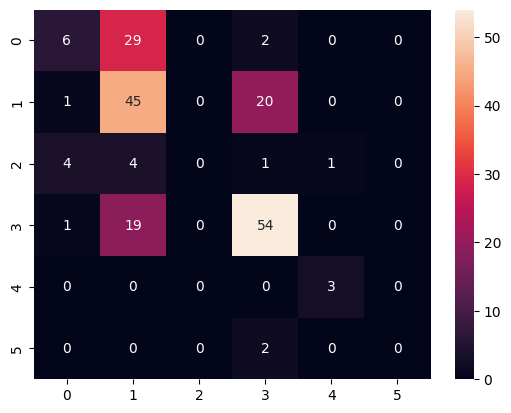

In [180]:
sns.heatmap(SVCConfusionMatrx, annot=True)

<Axes: >

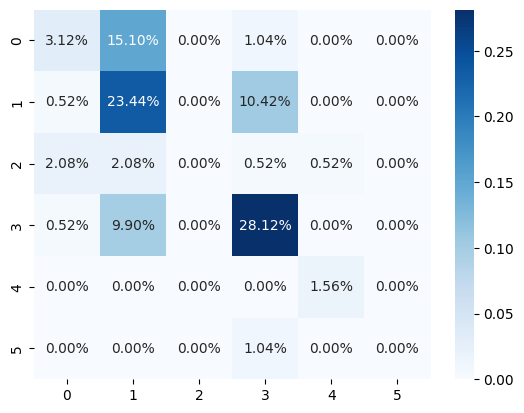

In [181]:
sns.heatmap(SVCConfusionMatrx/np.sum(SVCConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [182]:
# Accuracy
SVCAccuracyScore = accuracy_score(Stress_Y_Test, y_pred)
print(SVCAccuracyScore.round(2))

0.56


In [183]:
# Recall
SVCRecallScore = recall_score(Stress_Y_Test, y_pred, average='weighted')
print(SVCRecallScore.round(2))

0.56


In [184]:
# Precision
SVCPrecisionScore = precision_score(Stress_Y_Test, y_pred, average='weighted')
print(SVCPrecisionScore)

0.5309939332398104


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [185]:
# Root Mean Square Error
SVCRMSError = mean_squared_error(Stress_Y_Test, y_pred, squared=False)
print(SVCRMSError)

1.1319232


## Decision Tree

In [186]:
# instantiate the model (using the default parameters)
Stress_DT = DecisionTreeClassifier()

# fit the model with data
Stress_DT.fit(Stress_X_Train,Stress_Y_Train)

y_pred=Stress_DT.predict(Stress_X_Test)
print(y_pred)

[3. 0. 1. 1. 1. 3. 1. 0. 3. 3. 3. 5. 4. 3. 3. 3. 1. 1. 0. 3. 3. 3. 0. 3.
 4. 1. 1. 1. 1. 2. 1. 1. 1. 0. 1. 1. 1. 1. 3. 3. 1. 3. 3. 1. 1. 1. 0. 3.
 0. 3. 1. 2. 3. 0. 3. 0. 3. 0. 1. 0. 3. 1. 0. 1. 3. 1. 1. 1. 3. 0. 3. 3.
 3. 1. 3. 3. 1. 3. 3. 3. 1. 0. 3. 1. 0. 3. 3. 1. 1. 1. 1. 1. 3. 0. 0. 0.
 3. 1. 1. 3. 1. 3. 4. 0. 3. 3. 0. 3. 1. 0. 0. 3. 1. 0. 1. 1. 4. 1. 4. 3.
 3. 1. 0. 3. 1. 1. 3. 3. 3. 1. 1. 3. 1. 3. 3. 0. 3. 1. 0. 3. 0. 3. 3. 1.
 3. 0. 1. 0. 3. 2. 1. 0. 1. 1. 3. 1. 0. 3. 0. 0. 2. 0. 1. 0. 3. 1. 1. 3.
 1. 0. 3. 3. 3. 1. 1. 1. 0. 3. 3. 1. 3. 3. 3. 3. 0. 1. 1. 1. 1. 1. 1. 1.]


In [187]:
# Confusion Matrix
DTConfusionMatrx = confusion_matrix(Stress_Y_Test, y_pred)
print(DTConfusionMatrx)

[[28  4  3  2  0  0]
 [ 1 44  0 20  1  0]
 [ 7  1  1  0  1  0]
 [ 2 24  0 48  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  1  0  1]]


<Axes: >

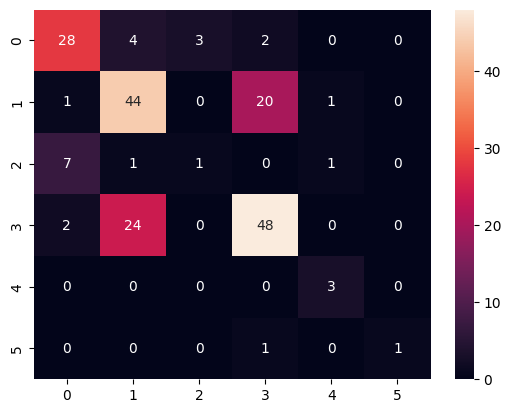

In [188]:
sns.heatmap(DTConfusionMatrx, annot=True)

<Axes: >

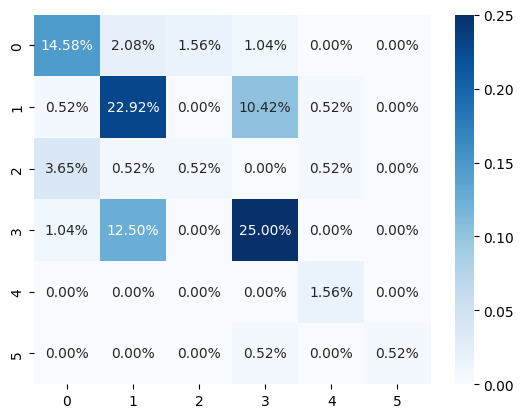

In [189]:
sns.heatmap(DTConfusionMatrx/np.sum(DTConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [190]:
# Accuracy
DTAccuracyScore = accuracy_score(Stress_Y_Test, y_pred)
print(DTAccuracyScore)

0.6510416666666666


In [191]:
# Recall
DTRecallScore = recall_score(Stress_Y_Test, y_pred, average='weighted')
print(DTRecallScore)

0.6510416666666666


In [192]:
# Precision
DTPrecisionScore = precision_score(Stress_Y_Test, y_pred, average='weighted')
print(DTPrecisionScore)

0.6425632751386956


In [193]:
# Root Mean Square Error
DTRMSError = mean_squared_error(Stress_Y_Test, y_pred, squared=False)
print(DTRMSError)

1.1967839


## Random Forest

In [194]:
# instantiate the model (using the default parameters)
Stress_RFClassifier = RandomForestClassifier()

# fit the model with data
Stress_RFClassifier.fit(Stress_X_Train, Stress_Y_Train)

# Predict the values using the Model
y_pred = Stress_RFClassifier.predict(Stress_X_Test)

In [195]:
# Confusion Matrix
RFConfusionMatrx = confusion_matrix(Stress_Y_Test, y_pred)
print(RFConfusionMatrx)

[[32  5  0  0  0  0]
 [ 1 52  0 12  1  0]
 [ 7  1  0  0  2  0]
 [ 3 19  0 52  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  2  0  0]]


<Axes: >

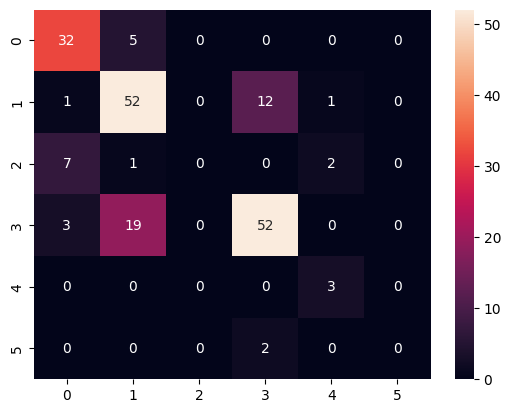

In [196]:
sns.heatmap(RFConfusionMatrx, annot=True)

<Axes: >

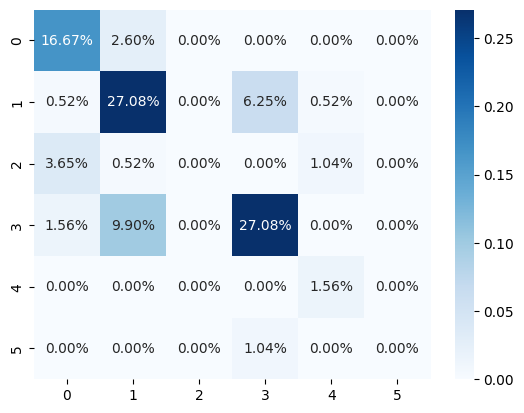

In [197]:
sns.heatmap(RFConfusionMatrx/np.sum(RFConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [198]:
# Accuracy
RFAccuracyScore = accuracy_score(Stress_Y_Test, y_pred)
print(RFAccuracyScore)

0.7239583333333334


In [199]:
# Recall
RFRecallScore = recall_score(Stress_Y_Test, y_pred, average='weighted')
print(RFRecallScore)

0.7239583333333334


In [200]:
# Precision
RFPrecisionScore = precision_score(Stress_Y_Test, y_pred, average='weighted')
print(RFPrecisionScore)

0.6870278260176516


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [201]:
# Root Mean Square Error
RFRMSError = mean_squared_error(Stress_Y_Test, y_pred, squared=False)
print(RFRMSError)

1.0483122


## Evaluating model performance

In [202]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Name of Model", "Accuracy", "Error Rate", "Precision", "Recall"])

myTable.title = 'Results for evaluation Parameters when Anxiety dataset is used'
myTable.add_row(["LR", round(LRAccuracyScore,3), round(1 - LRAccuracyScore, 3), round(LRPrecisionScore,3), round(LRRecallScore,3),  ])
myTable.add_row(["GNB", round(NaiveBayesAccuracyScore,3), round(1 - NaiveBayesAccuracyScore,3), round(GNBPrecisionScore,3), round(GNBRecallScore,3) ])
myTable.add_row(["KNN", round(KNNAccuracyScore,3), round(1 - KNNAccuracyScore,3), round(KNNPrecisionScore,3), round(KNNRecallScore,3)])
myTable.add_row(["SVC", round(SVCAccuracyScore,3), round(1 - SVCAccuracyScore,3), round(SVCPrecisionScore,3), round(SVCRecallScore,3) ])
myTable.add_row(["DT", round(DTAccuracyScore,3), round(1 - DTAccuracyScore,3) , round(DTPrecisionScore,3), round(DTRecallScore,3) ])
myTable.add_row(["RF", round(RFAccuracyScore,3), round(1 - RFAccuracyScore,3) , round(RFPrecisionScore,3), round(RFRecallScore,3) ])

print(myTable)
# print(myTable1)

+---------------+----------+------------+-----------+--------+
| Name of Model | Accuracy | Error Rate | Precision | Recall |
+---------------+----------+------------+-----------+--------+
|       LR      |  0.682   |   0.318    |   0.669   | 0.682  |
|      GNB      |  0.505   |   0.495    |   0.475   | 0.505  |
|      KNN      |   0.63   |    0.37    |   0.594   |  0.63  |
|      SVC      |  0.562   |   0.438    |   0.531   | 0.562  |
|       DT      |  0.651   |   0.349    |   0.643   | 0.651  |
|       RF      |  0.724   |   0.276    |   0.687   | 0.724  |
+---------------+----------+------------+-----------+--------+


# Overall Evaluation

The respective highest accuracies have been obtained by the models as shown below:

1. Depression - Random Forest
2. Anxiety - Logistic Regression
3. Stress - Random Forest

## For taking user inputs for diagnosis:

In [209]:
userAge = int(input("Enter your Age: "))

userGender = int(input("Enter your Gender (0 for Female, 1 for Male): "))
if userGender == 1:
  userGender = True
else:
  userGender = False

userBMI = float(input("Enter your Body Mass Index (BMI) score: "))

'''
Class I Obesity: 0
Normal: 1
Overweight: 2
Not Availble: 3
Class III Obesity: 4
Class II Obesity: 5
'''
userWHOBMI = int(input("Enter your BMI Class:\n0. Class I Obesity\n1. Normal\n2. Overweight\n3. Not Availble\n4. Class III Obesity\n5. Class II Obesity\n"))

userPHQScore = int(input("Enter your Physique Score (phqScore): "))

userSuicidal = int(input("Do you have suicidal tendency? (0 for NO, 1 for YES): "))

userSleepiness = int(input("Do you have face sleepiness? (0 for NO, 1 for YES): "))

# Related to Depression
userDepressiveness = int(input("Do you face depressiveness? (0 for NO, 1 for YES): "))

userDepressionDiagnosis = int(input("Were you diagnosed before for depression? (0 for NO, 1 for YES): "))

userDepressionTreatment = int(input("Have you undergone a depression treatment before? (0 for NO, 1 for YES): "))

# Related to Anxiety
userGADScore = int(input("Enter your GAD Score: "))

userAnxiousness = int(input("Do you face anxiousness? (0 for NO, 1 for YES): "))

userAnxietyDiagnosis = int(input("Were you diagnosed before for anxiety? (0 for NO, 1 for YES): "))

userAnxietyTreatment = int(input("Have you undergone an anxiety treatment before? (0 for NO, 1 for YES): "))

userEPWorthScore = int(input("Enter your EPWorth Score: "))

# Related to Stress

userStressfulness = int(input("Do you face stressfulness? (0 for NO, 1 for YES): "))

userStressDiagnosis = int(input("Were you diagnosed before for stress? (0 for NO, 1 for YES): "))

userStressTreatment = int(input("Have you undergone a stress treatment before? (0 for NO, 1 for YES): "))

userPSSScore = int(input("Enter your PSS Score: "))

print("\nThe entered user details are:")
print("Age:", userAge)
print("Gender:", "Male" if userGender == True else "Female")
print("BMI score:", userBMI)

if userWHOBMI == 1:
  print("BMI: Normal")
elif userWHOBMI == 2:
  print("BMI: Overweight")
elif userWHOBMI == 3:
  print("BMI: Not Availble")
elif userWHOBMI == 0:
  print("BMI: Class I Obesity")
elif userWHOBMI == 5:
  print("BMI: Class II Obesity")
else:
  print("BMI: Class III Obesity")

print("Physique Score:", userPHQScore)
print("GAD Score:", userGADScore)
print("EPWorth Score:", userEPWorthScore)
print("PSS Score:", userPSSScore)

print("Facing depressiveness: ", "Yes" if userDepressiveness == 1 else "No")
print("Diagnosed with depression before: ", "Yes" if userDepressionDiagnosis == 1 else "No")
print("Undergone depression treatment: ", "Yes" if userDepressionTreatment == 1 else "No")

print("Facing anxiousness: ", "Yes" if userAnxiousness == 1 else "No")
print("Diagnosed with anxiety before: ", "Yes" if userAnxietyDiagnosis == 1 else "No")
print("Undergone anxiety treatment: ", "Yes" if userAnxietyTreatment == 1 else "No")

print("Facing stressfulness: ", "Yes" if userStressfulness == 1 else "No")
print("Diagnosed with stress before: ", "Yes" if userStressDiagnosis == 1 else "No")
print("Undergone stress treatment: ", "Yes" if userStressTreatment == 1 else "No")

Enter your Age: 18
Enter your Gender (0 for Female, 1 for Male): 0
Enter your Body Mass Index (BMI) score: 26.5625
Enter your BMI Class:
0. Class I Obesity
1. Normal
2. Overweight
3. Not Availble
4. Class III Obesity
5. Class II Obesity
2
Enter your Physique Score (phqScore): 8
Do you have suicidal tendency? (0 for NO, 1 for YES): 0
Do you have face sleepiness? (0 for NO, 1 for YES): 1
Do you face depressiveness? (0 for NO, 1 for YES): 0
Were you diagnosed before for depression? (0 for NO, 1 for YES): 0
Have you undergone a depression treatment before? (0 for NO, 1 for YES): 0
Enter your GAD Score: 12
Do you face anxiousness? (0 for NO, 1 for YES): 1
Were you diagnosed before for anxiety? (0 for NO, 1 for YES): 0
Have you undergone an anxiety treatment before? (0 for NO, 1 for YES): 0
Enter your EPWorth Score: 14
Do you face stressfulness? (0 for NO, 1 for YES): 1
Were you diagnosed before for stress? (0 for NO, 1 for YES): 0
Have you undergone a stress treatment before? (0 for NO, 1 f

## For calculating if the User has Depression and also, to what extent


**Depression takes parameters in the following order:**

[age, gender, bmi, who_bmi, phq_score, depressiveness, suicidal, depression_diagnosis, depression_treatment, sleepiness]

In [210]:
features = np.array([[ userAge, userGender, userBMI, userWHOBMI, userPHQScore, userDepressiveness, userSuicidal, userDepressionDiagnosis, userDepressionTreatment,userSleepiness ]])
warnings.filterwarnings("ignore")

# using inputs to predict the output
depressionPrediction = Depression_RFClassifier.predict(features)
depressionArray=[]

# Classes used for prediction
'''
Mild: 0
Moderately severe: 1
None-minimal: 2
Moderate: 3
Severe: 4
none: 5
'''
if int(depressionPrediction) == 0:
  print("Depression Predicted: Mild - 20-40%")
  depressionArray=[20,40,"Mild"]
elif depressionPrediction == 1:
  print("Depression Predicted: Moderately severe - 60-80%")
  depressionArray=[60,80,"Moderately Severe"]
elif depressionPrediction == 2:
  print("Depression Predicted: None-minimal - 0-20%")
  depressionArray=[0,20,"None-minimal"]
elif depressionPrediction == 3:
  print("Depression Predicted: Moderate - 40-60%")
  depressionArray=[40,60,"Moderate"]
elif depressionPrediction == 4:
  print("Depression Predicted: Severe - 80-100%")
  depressionArray=[80,100,"Severe"]
else:
  print("0% Depression is predicted. The patient is not feeling depression!")
  depressionArray=[0,0,"No Depression!"]



Depression Predicted: Mild - 20-40%


## For calculating if the User has Anxiety and also, to what extent


**Anxiety takes parameters in the following order:**

[age, gender, bmi, who_bmi, phq_score, suicidal, gad_score, anxiousness, anxiety_diagnosis, anxiety_treatment, sleepiness  ]

In [211]:
features = np.array([[ userAge, userGender, userBMI, userWHOBMI, userPHQScore, userSuicidal, userGADScore, userAnxiousness, userAnxietyDiagnosis,userAnxietyTreatment, userSleepiness]])
warnings.filterwarnings("ignore")

# using inputs to predict the output
anxietyPrediction = Anxiety_logreg.predict(features)
anxietyArray=[]

# Classes used for prediction
'''
Moderate: 0
Mild: 1
Severe:2
None-minimal: 3
'''
if int(anxietyPrediction) == 0:
  print("Anxiety Predicted: Moderate - 50-75%")
  anxietyArray=[50,75,"Moderate"]
elif anxietyPrediction == 1:
  print("Anxiety Predicted: Mild - 25-50%")
  anxietyArray=[25,50,"Mild"]
elif anxietyPrediction == 3:
  print("Anxiety Predicted: None-minimal - 0-25%")
  anxietyArray=[0,25,"None-minimal"]
elif anxietyPrediction == 3:
  print("Anxiety Predicted: Severe - 75-100%")
  anxietyArray=[75,100,"Severe"]
else:
  print("0% Anxiety is predicted. The patient is not feeling anxiety!")
  anxietyArray=[0,0,"No Anxiety!"]



Anxiety Predicted: Moderate - 50-75%


## For calculating if the User has Stress and also, to what extent


**Stress takes parameters in the following order:**

[age, gender, bmi, who_bmi, phq_score, suicidal, epworth_score,sleepiness, stressfulness, stress_diagnosis, stress_treatment,pss_score ]

In [212]:
features = np.array([[ userAge, userGender, userBMI, userWHOBMI, userPHQScore, userSuicidal, userEPWorthScore, userSleepiness, userStressfulness, userStressDiagnosis, userStressTreatment, userPSSScore ]])
warnings.filterwarnings("ignore")

# using inputs to predict the output
stressPrediction = Stress_RFClassifier.predict(features)
stressArray=[]

# Classes used for prediction
'''
Moderate: 0
Mild: 1
Severe:2
None-minimal: 3
Moderately severe: 4
none: 5
'''
if int(stressPrediction) == 0:
  print("Stress Predicted: Moderate - 40-60%")
  stressArray=[40,60,"Moderate"]
elif stressPrediction == 1:
  print("Stress Predicted: Mild - 20-40%")
  stressArray=[20,40,"Mild"]
elif stressPrediction == 2:
  print("Stress Predicted: Severe - 80-100%")
  stressArray=[80,100,"Severe"]
elif stressPrediction == 3:
  print("Stress Predicted: None-minimal - 0-20%")
  stressArray=[0,20,"None-minimal"]
elif stressPrediction == 4:
  print("Stress Predicted: Moderately severe - 60-80%")
  stressArray=[60,80,"Moderately Severe"]
else:
  print("0% Stress is predicted. The patient is not feeling stress!")
  stressArray=[0,0,"No Stress!"]



Stress Predicted: Moderate - 40-60%


## Visualisation

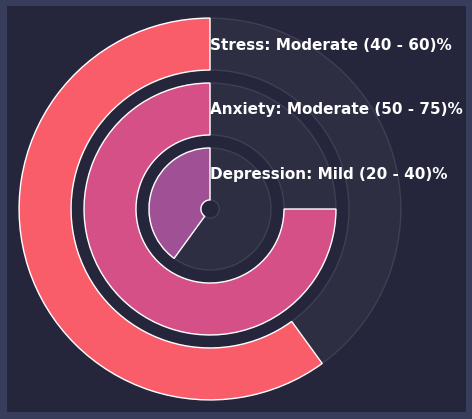

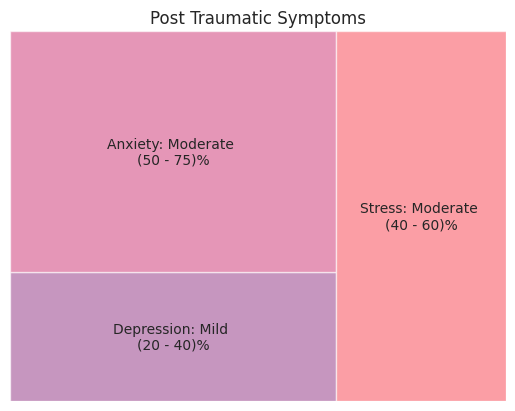

In [213]:
#Load data into pandas dataframe

values = {'Disorders': ['Depression', 'Anxiety', 'Stress'],
             'COUNT': [ depressionArray[1], anxietyArray[1],  stressArray[1]]}

df = pd.DataFrame.from_dict(values)

# Get key properties for colours and labels
# max_value_full_ring = max(df['COUNT'])
max_value_full_ring = 100

ring_colours = [ '#a05195','#d45087', '#f95d6a']

# ring_labels = [f'   {x} ({v}) ' for x, v in zip(list(df['Disorders']), list(df['COUNT']))]
ring_labels = [f'Depression: {depressionArray[2]} ({depressionArray[0]} - {depressionArray[1]})%',
               f'Anxiety: {anxietyArray[2]} ({anxietyArray[0]} - {anxietyArray[1]})%',
               f'Stress: {stressArray[2]} ({stressArray[0]} - {stressArray[1]})%']


data_len = len(df)

# Begin creating the figure
fig = plt.figure(figsize=(5,5), linewidth=10,
                 edgecolor='#393d5c',
                 facecolor='#25253c')

rect = [0.1,0.1,0.8,0.8]

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)

# Loop through each entry in the dataframe and plot a grey
# ring to create the background for each one
for i in range(data_len):
    ax_polar_bg.barh(i, max_value_full_ring*2*np.pi/max_value_full_ring,
                     color='grey',
                     alpha=0.1)
# Hide all axis items
ax_polar_bg.axis('off')

# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0, 1, 2],
                    labels=ring_labels,
                    angle=0,
                    fontsize=11, fontweight='bold',
                    color='white', verticalalignment='center')

# Loop through each entry in the dataframe and create a coloured ring for each entry
for i in range(data_len):
    ax_polar.barh(i, list(df['COUNT'])[i]*2*np.pi/max_value_full_ring,
                  color=ring_colours[i])


# Hide all grid elements for the
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=False, bottom=False,
                   labelbottom=False, labelleft=True)

plt.show()


# ------------------------- For a treemap
# data = {'labels': ["A","B","C","D","E","F","G"],
        # 'values':[10,20,25,35,10,25,45]}
values = {'Disorders': ['Depression', 'Anxiety', 'Stress'],
             'COUNT': [ depressionArray[1], anxietyArray[1],  stressArray[1]] }
colors = [ '#a05195','#d45087', '#f95d6a']

df = pd.DataFrame(values)
df #print the dataframe

sns.set_style(style="whitegrid") # set seaborn plot style
sizes= df["COUNT"].values# proportions of the categories
label=[f'Depression: {depressionArray[2]} \n({depressionArray[0]} - {depressionArray[1]})%',
               f'Anxiety: {anxietyArray[2]} \n({anxietyArray[0]} - {anxietyArray[1]})%',
               f'Stress: {stressArray[2]} \n({stressArray[0]} - {stressArray[1]})%']
squarify.plot(sizes=sizes, label=label, alpha=0.6,color=colors).set(title='Post Traumatic Symptoms')
plt.axis('off')
plt.show()
